# Statistical Methods in Astrophysics Exercises

## Week 03: Probability Distribution Functions

### Personal Information

**Name:** physnya



### Exercise 1: Steady Astronomical Source

A steady astronomical source has flux $\phi = 100\,{\rm photon}\,{\rm s}^{-1}$. It is observed for a total exposure time of $T = 60\,{\rm s}$. Assume that the detection efficiency is 100%.

#### Question 1.1: Distribution of photon inter-arrival intervals

**Tasks:**
1. Simulate the arrival times of photons from this source.
2. Plot the distribution of time intervals between consecutive photon arrivals with appropriate axes scales.
3. Overlay the theoretical distribution of time intervals for a Poisson process with the same rate, with the formula derived in the lecture slides: $p(\tau) = \phi e^{-\phi \tau}$, where $\tau$ is the time interval between consecutive arrivals.


In [2]:
# NOTE: Run this cell in the first place
# Load packages for numerical calculations and plotting

import numpy as np
import matplotlib.pyplot as plt
# Enable inline plotting in Jupyter notebooks
plt.rcParams['figure.figsize'] = (9.6, 5.4)
plt.rcParams['figure.dpi'] = 300
%matplotlib inline
plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')
# 由于设置了图片的高 dpi 和字体，所以编译速度变慢.

In [3]:
def photon_arrivals(flux, duration, seed = 42):
    """Simulate photon arrival times for a steady source.
    Args:
        flux (float): Photon flux in photons per second.
        duration (float): Total observation time in seconds.
        seed (int): Random seed for reproducibility.
    Returns:
        Array of photon arrival times in seconds.
    """
    rng = np.random.default_rng(seed)
    count = rng.poisson(flux * duration) # Sample total number of photons
    arrivals = rng.uniform(0, duration, size = count) # Sample arrival times
    arrivals.sort()
    return arrivals

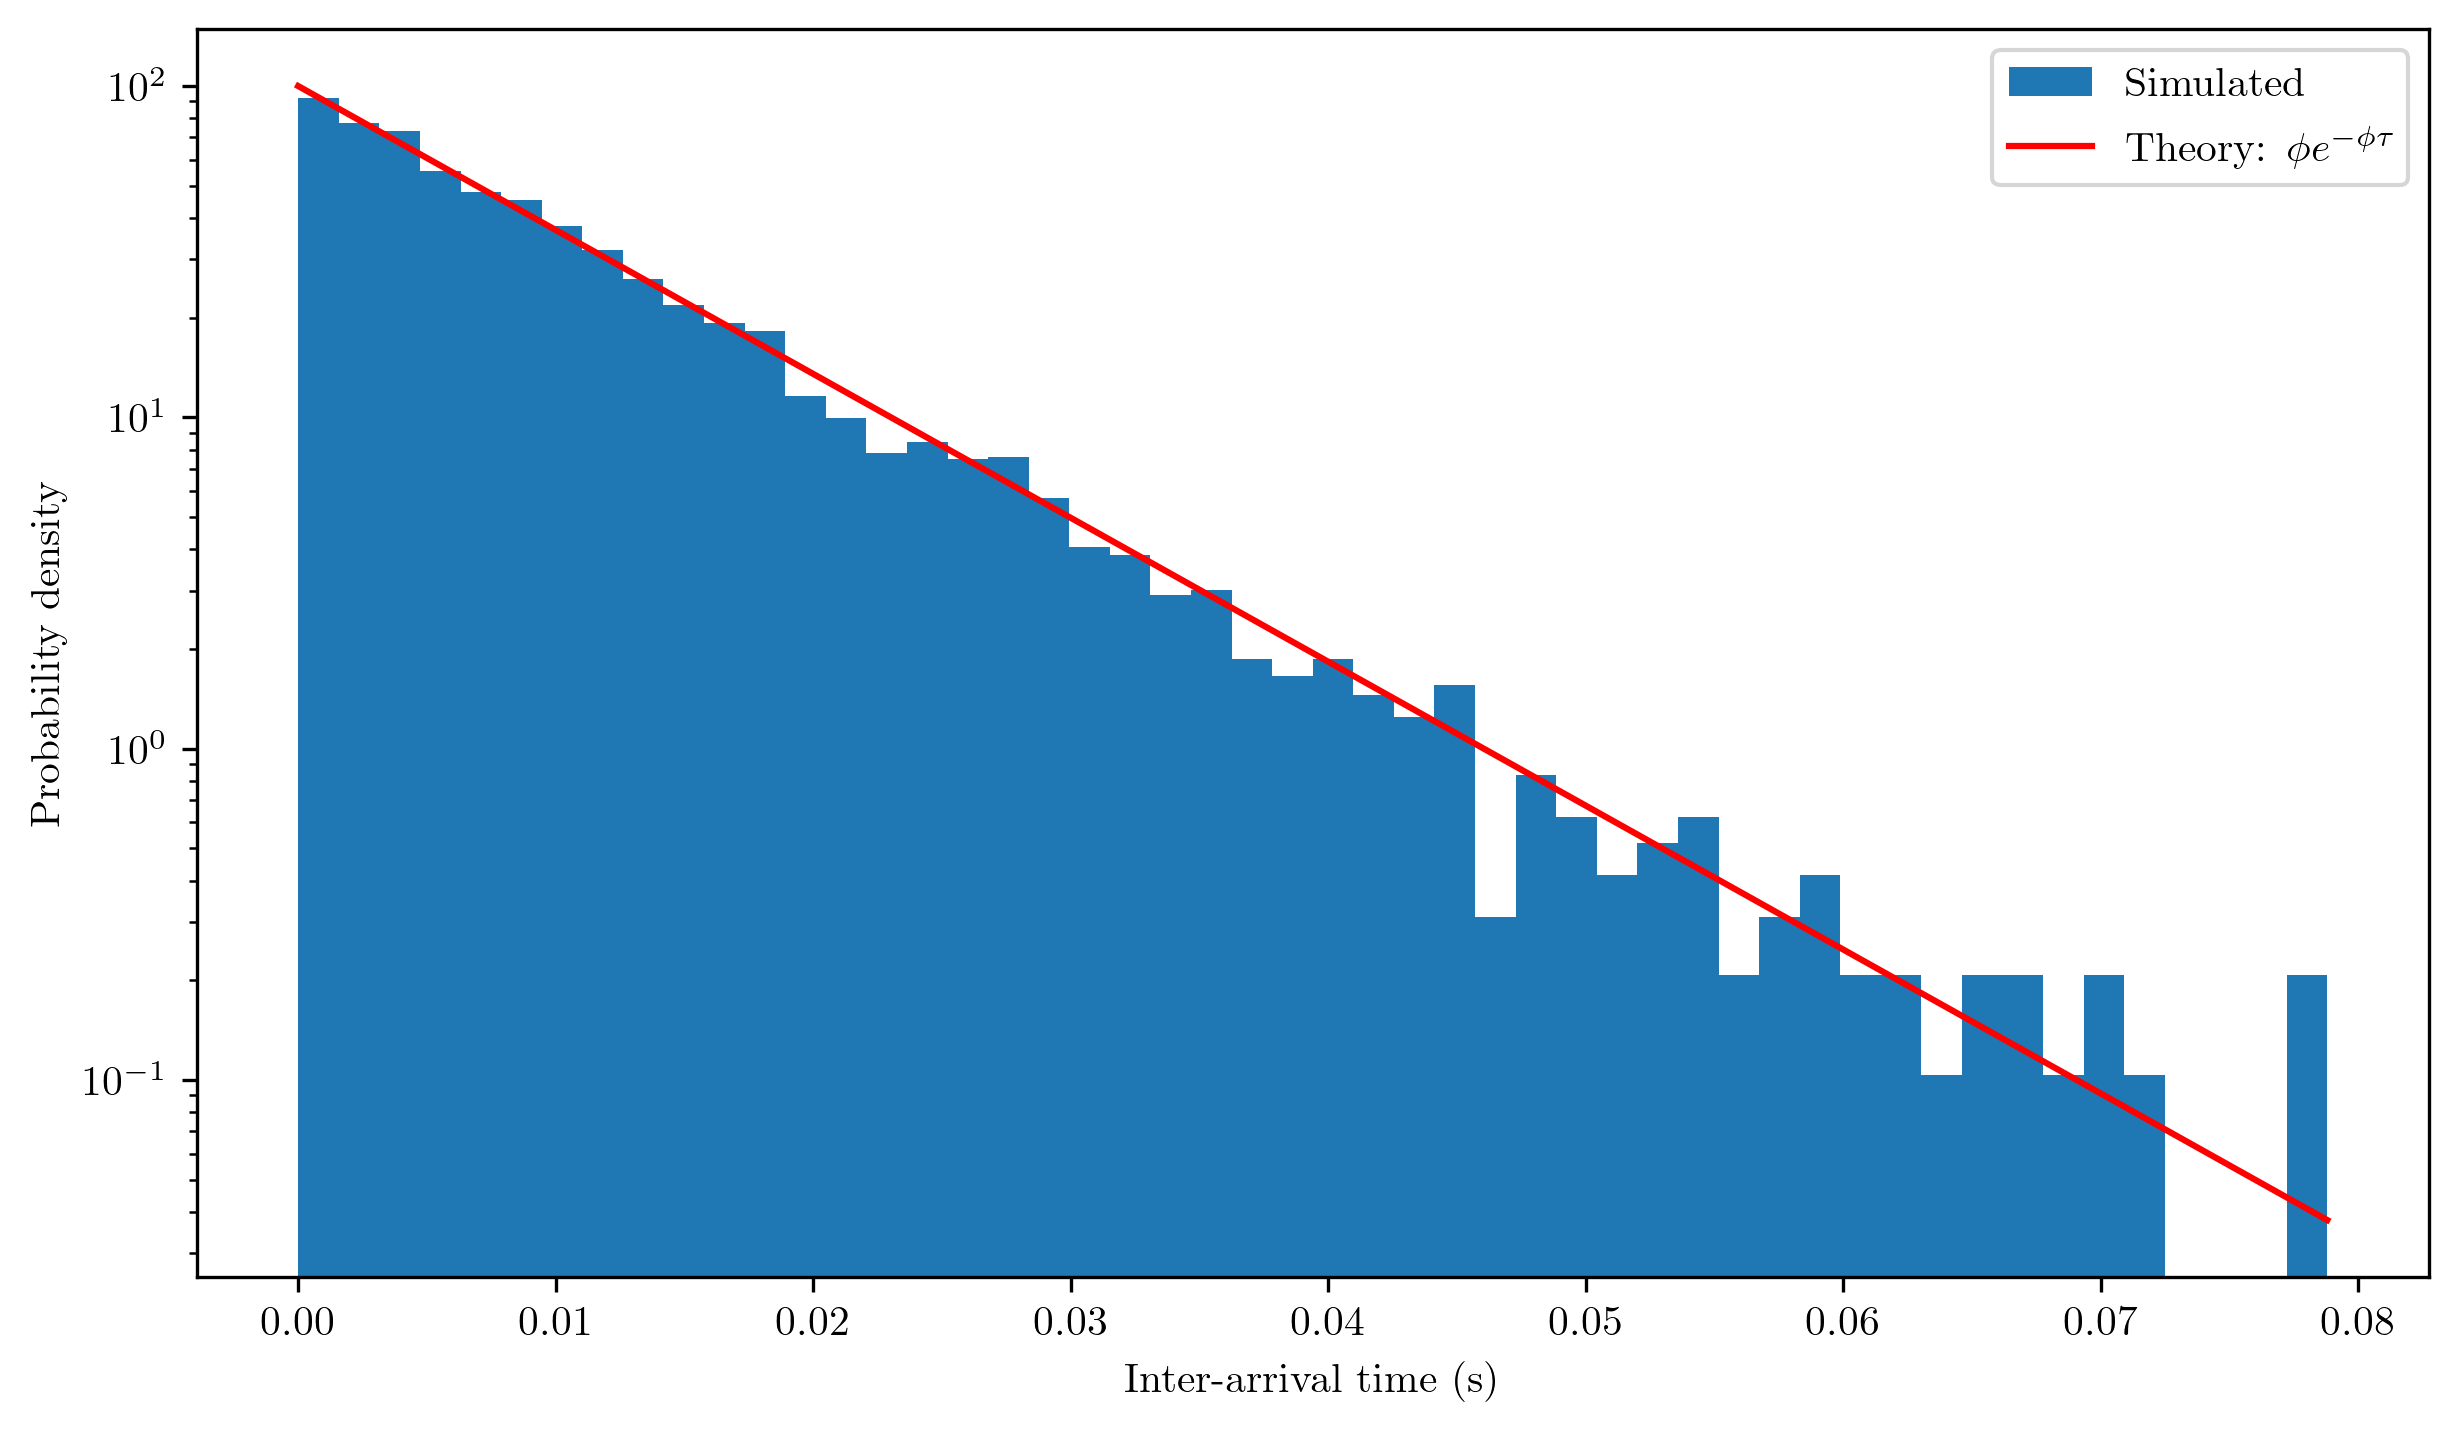

In [4]:
# Set the random seed
seed = 2024011182 # NOTE: EDIT HERE to insert your seed as the seed

flux = 100 # photon/s
duration = 60 # s
arrivals = photon_arrivals(flux, duration, seed = seed)
intervals = np.diff(arrivals)

# NOTE: EDIT BELOW to plot the histogram of intervals and overlay the theoretical distribution
# Plot histogram of inter-arrival intervals and overlay the theoretical exponential distribution
plt.hist(
    intervals, 
    bins = 50, 
    density = True, 
    label = 'Simulated',
)

tau = np.linspace(0, intervals.max(), 500)
p_tau = flux * np.exp(-flux * tau) # p(\tau) = \phi * \exp(-\phi * \tau)
plt.plot(
    tau, 
    p_tau,
    'r-', 
    label = r'Theory: $\phi e^{-\phi \tau}$',
)
plt.yscale('log')
plt.xlabel('Inter-arrival time (s)')
plt.ylabel('Probability density')
plt.legend()
plt.show()


#### Question 1.2: Poisson clumps with short exposures

Split the total exposure into short frames of $t_{\rm fr} = 10\,{\rm ms}$.

**Tasks:**
1. For the simulation in Question 1.1, bin the arrivals into frames of length $t_{\rm fr} = 10\,{\rm ms}$.
2. Compute the fraction of frames with at least 5 photons (i.e., five times the per-frame expectation) for each run, and report the mean fraction over the 100 runs.

In [5]:
t_fr = 0.01 # s
bin_edges = np.arange(0, duration + t_fr, t_fr)
counts, _ = np.histogram(arrivals, bins = bin_edges)
# compute the fraction of exposures (frames) with at least 5 photons
fraction = np.count_nonzero(counts >= 5) / counts.size

print(f"Mean fraction of exposures with at least 5 photons: {fraction:.2%}")

Mean fraction of exposures with at least 5 photons: 0.32%


#### Question 1.3: Waiting time to the $k$-th photon

Let $t_k$ be the waiting time from $t=0$ to the arrival of the $k$-th photon. The probability distribution function of $t_k$ is given by the Gamma (Erlang) distribution:

$$p(t_k) = \frac{\phi^k t_k^{k-1} e^{-\phi t_k}}{(k-1)!}$$

**Tasks:**
1. Using the same simulation results from Question 1.1, plot the distribution of $t_5$, i.e., the waiting time to the 5th photon.
2. Overlay the theoretical distribution of $t_5$ using the formula above.

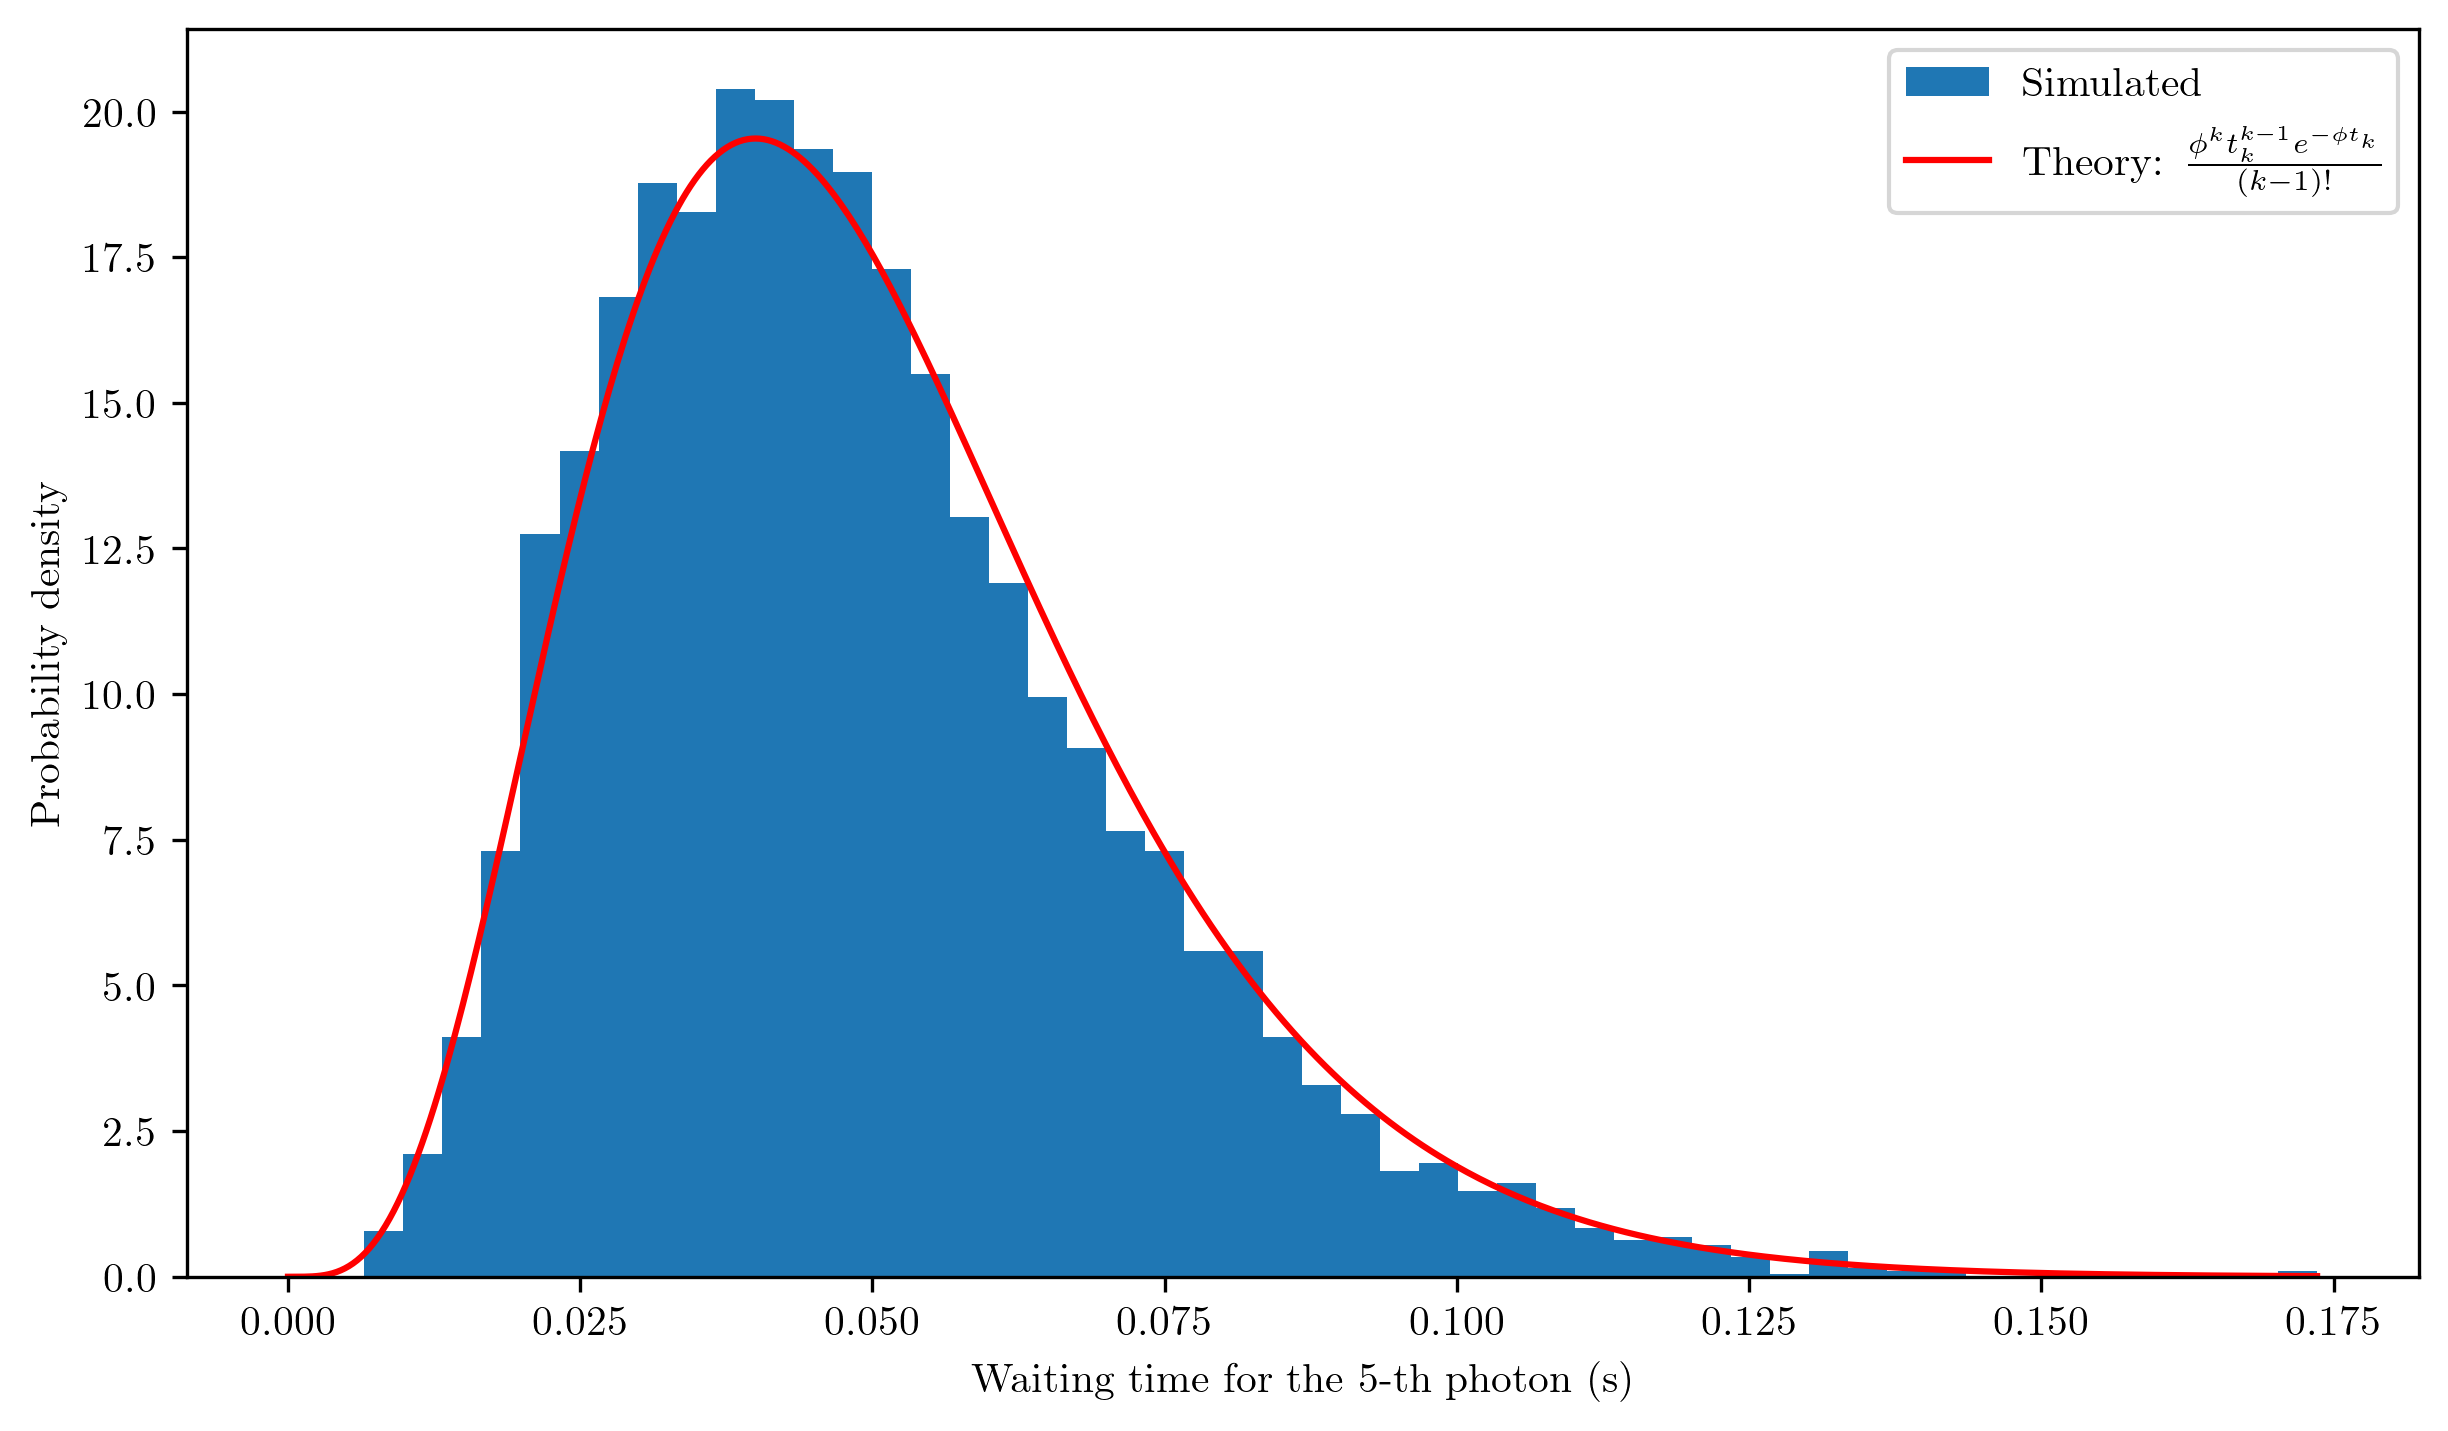

In [6]:
# For each photon, compute the waiting time to the 5th photon after it
t5 = np.convolve(intervals, np.ones(5), mode = 'valid')

# NOTE: EDIT BELOW to plot the histogram of t5 and overlay the theoretical distribution
plt.hist(
    t5,
    bins = 50,
    density = True,
    label = 'Simulated',
)

tau_5 = np.linspace(0, t5.max(), 500)
p_tau_5 = flux**5 * tau_5**4 * np.exp(-flux * tau_5) / 24 # \phi^k * t_k^{k-1} * e^{-\phi t_k}/(k-1)!
plt.plot(
    tau_5,
    p_tau_5,
    'r-',
    label = r'Theory: $\frac{\phi^k t_k^{k-1} e^{-\phi t_k}}{(k-1)!}$'
)

plt.xlabel('Waiting time for the $5$-th photon (s)')
plt.ylabel('Probability density')
plt.legend()
plt.show()

### Exercise 2: Central Limit Theorem (CLT)

Let $\{ X_i \}_{i=1}^n$ be a sequence of independent random variables drawn from the same distribution with mean $\mu$ and finite variance $\sigma^2$. The Central Limit Theorem states that the distribution of

$$Z_n = \frac{\sum_{i=1}^n X_i - n\mu}{\sigma \sqrt{n}}$$

converges to the standard normal distribution (Gaussian distribution with mean 0 and unit variance) as $n \to \infty$.

#### Question 2.1: Source brightness

The same steady astronomical source with flux $\phi = 100\,{\rm photon}\,{\rm s}^{-1}$ as in Exercise 1 is observed with short frames of $t_{\rm fr} = 10\,{\rm ms}$. Assume a detection efficiency of 100%.

The measured brightness (flux) of the source with a total exposure time with $N_{\rm fr}$ frames is given by the total number of detected photons divided by the total exposure time:

$$\tilde{\phi} = \frac{N_{\rm detected}}{N_{\rm fr} \cdot t_{\rm fr}}$$

**Tasks:**
1. Simulate the photon counts in 256,000 frames. Plot the distribution of the measured brightness $\tilde{\phi}$ with single-frame exposures. Overlay the theoretical distribution of $\tilde{\phi}$.
2. For multiple-frame exposures with $N_{\rm fr} = 1, 4, 16, 64, 256, 1024$, compute the measured brightness $\tilde{\phi}$ for each exposure. Plot the distribution of $\tilde{\phi}$ for each $N_{\rm fr}$.
3. Overlay a theoretical Gaussian distribution on each histogram.

**Hint:** From the CLT, derive what the mean and standard deviation of the Gaussian distribution are, and how they depend on $N_{\rm fr}$.

In [7]:
# Set the random seed
seed = 2024011182 # NOTE: EDIT HERE to insert your seed as the seed

flux = 100 # photon/s
t_fr = 0.01 # frame time: 10 ms
nsamples = 256000 # number of frames to simulate

# Simulate photon counts in each frame
rng = np.random.default_rng(seed)
num_photons = rng.poisson(flux * t_fr, size = nsamples)

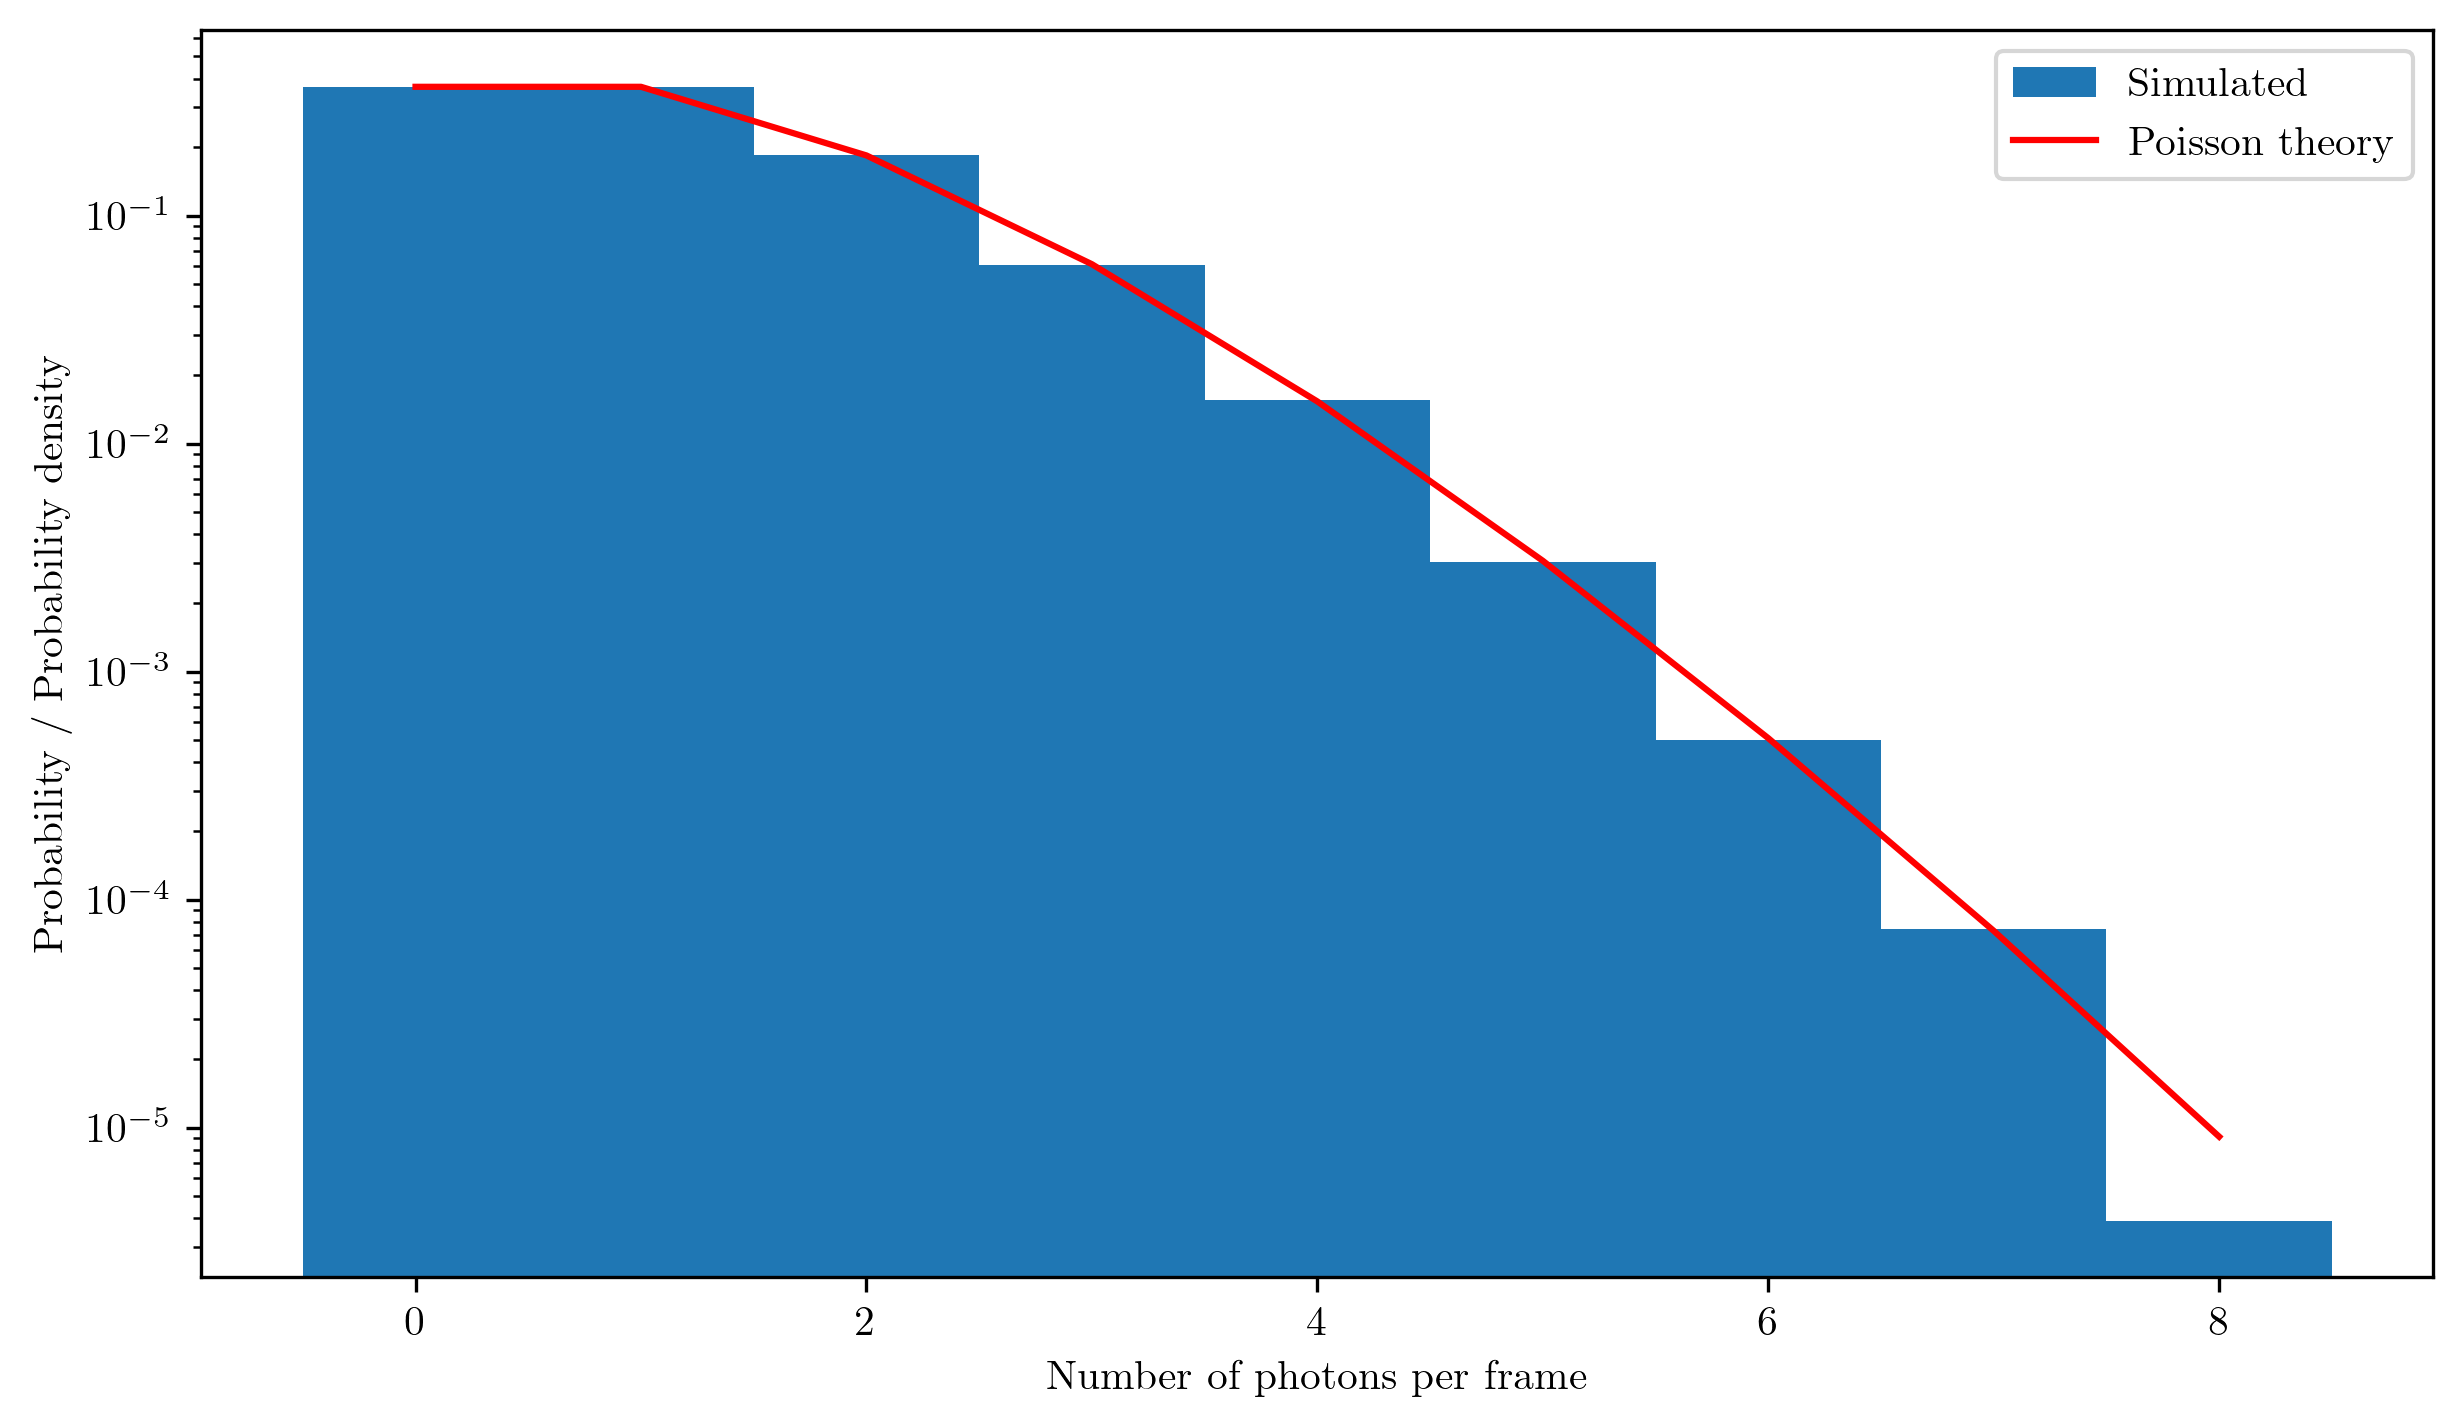

In [8]:
# NOTE: EDIT BELOW to plot the histogram of num_photons and overlay the theoretical Poisson distribution
# Use integer-centered bins for counts and overlay the Poisson PMF for k = 0..kmax
plt.hist(
    num_photons,
    bins = np.arange(num_photons.min(), num_photons.max() + 2) - 0.5,
    density = True,
    label = 'Simulated',
)

from scipy import stats
lam = flux * t_fr
ks = np.arange(0, num_photons.max() + 1)
pmf = stats.poisson.pmf(ks, lam)
plt.plot(
    ks,
    pmf,
    "r-",
    label = 'Poisson theory'
)
plt.yscale('log')
plt.xlabel('Number of photons per frame')
plt.ylabel('Probability / Probability density')
plt.legend()
plt.show()

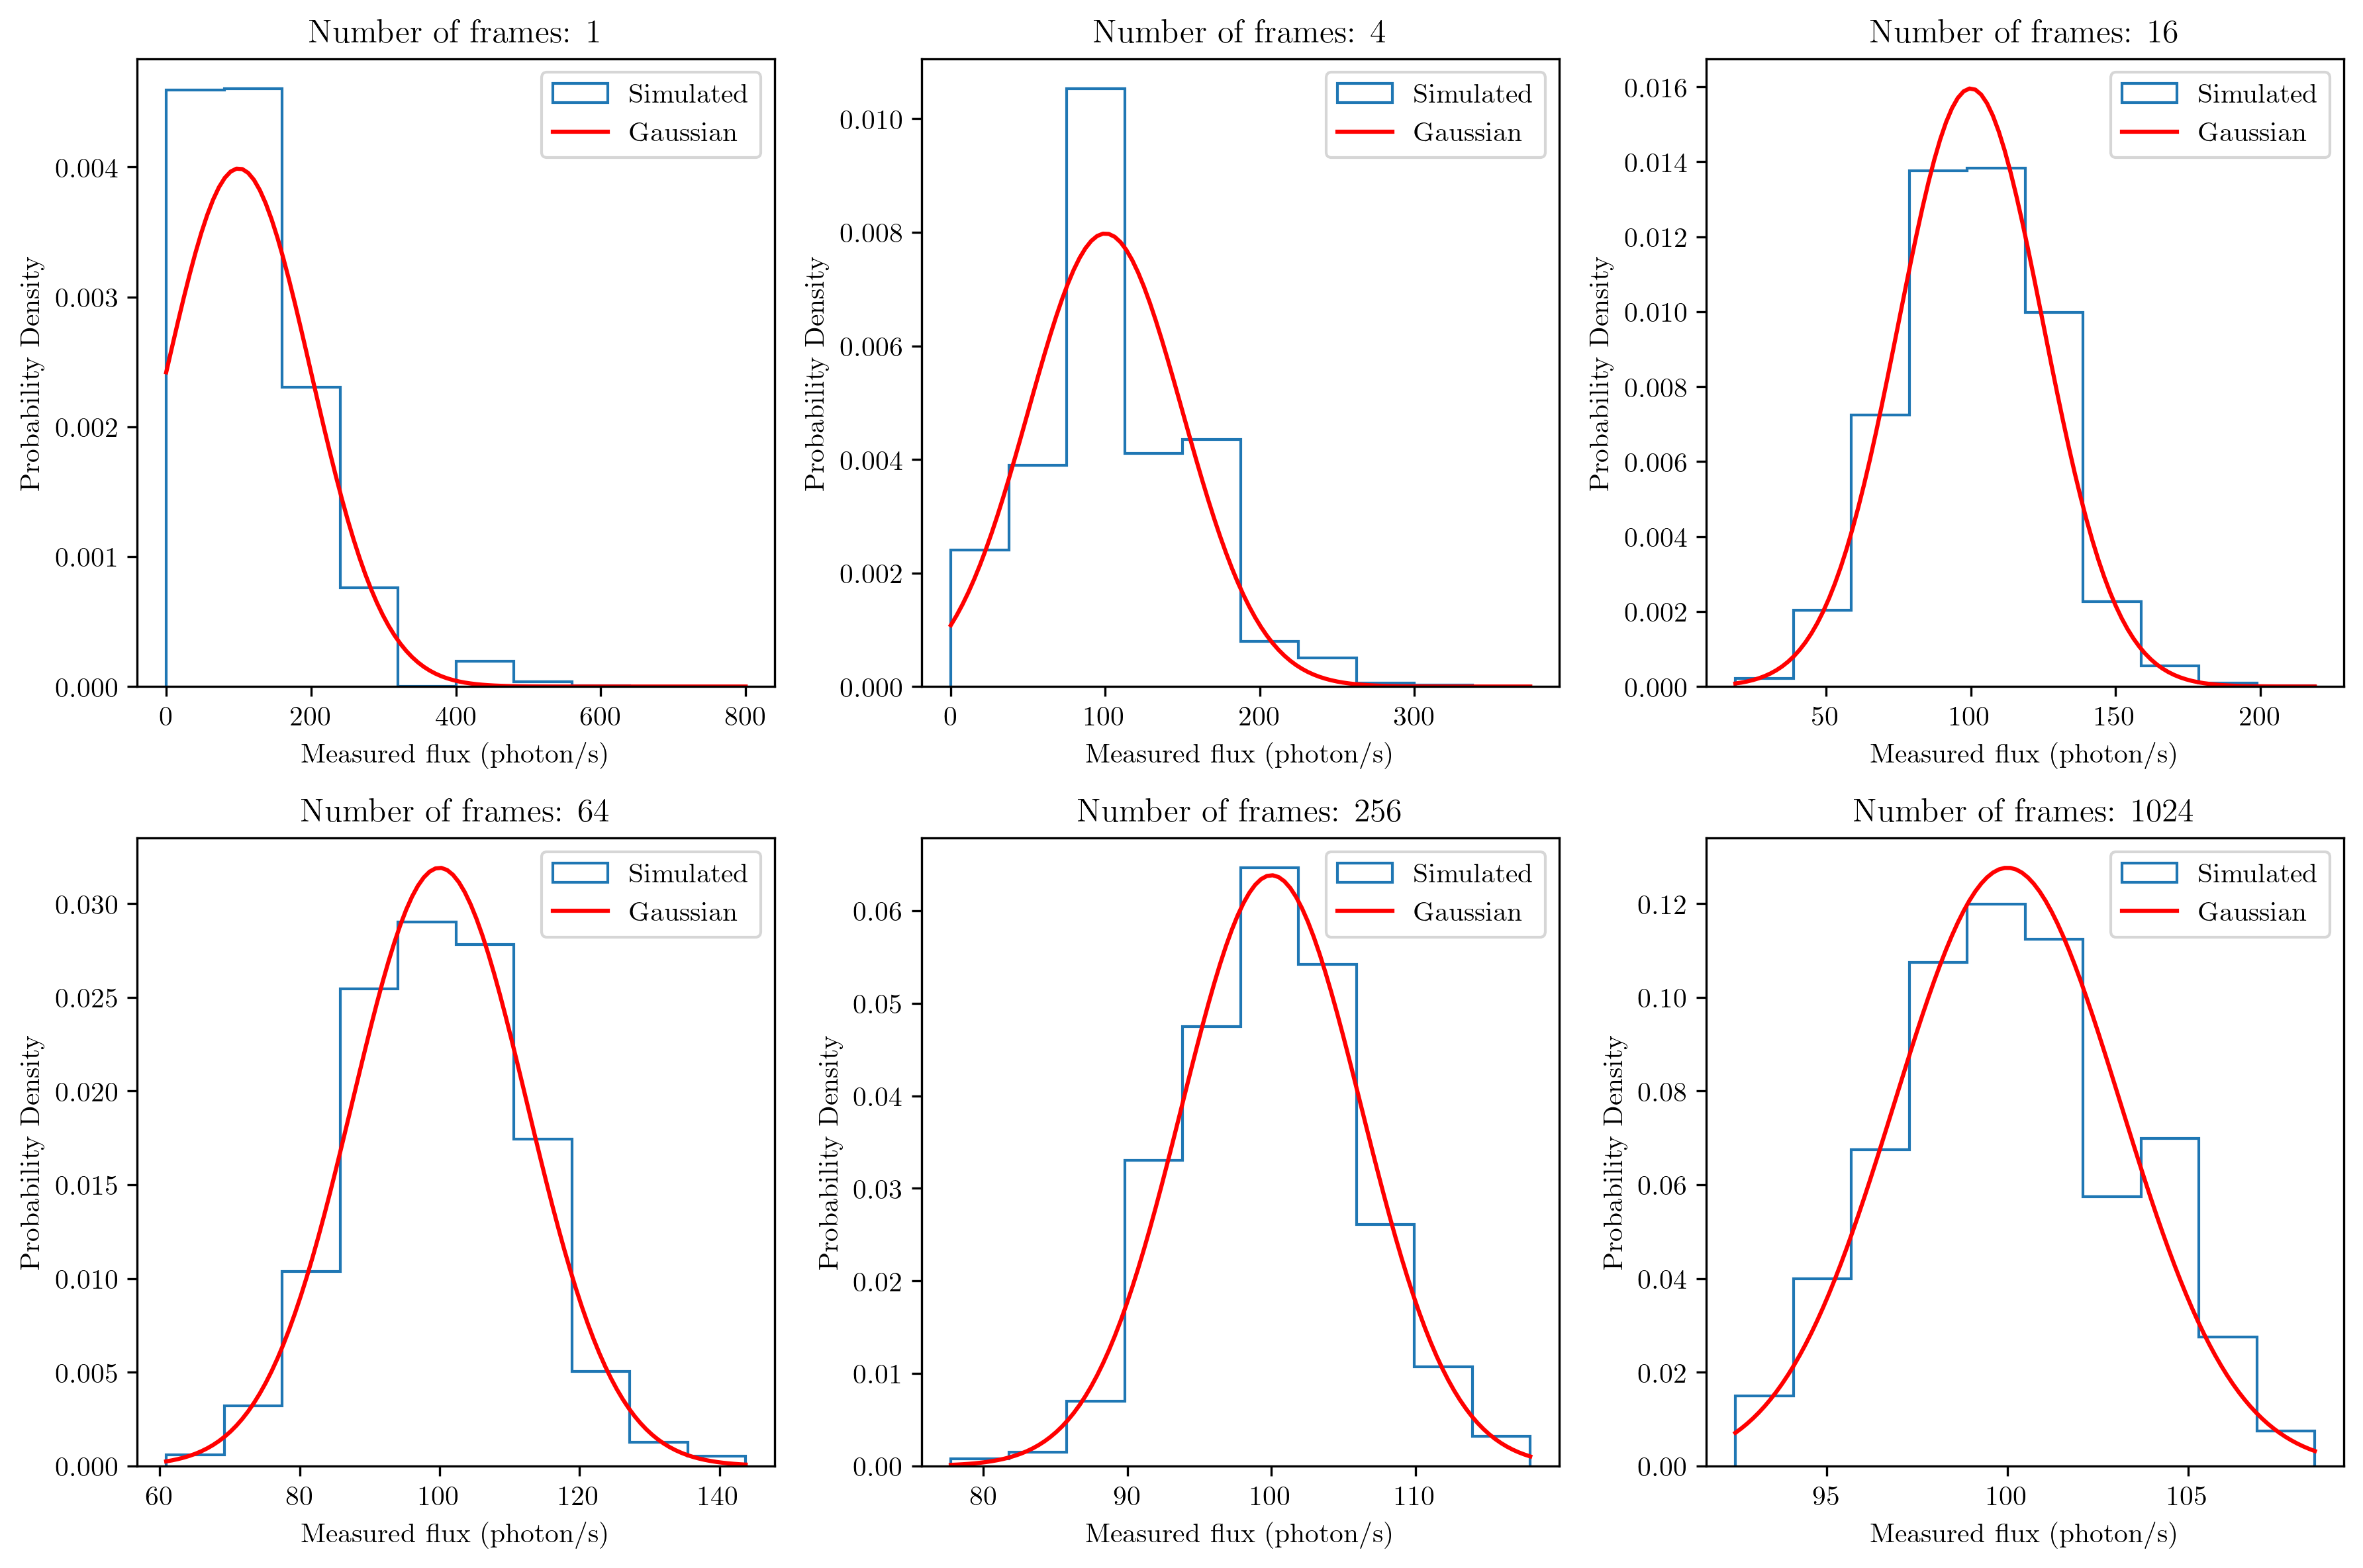

In [9]:
nframes = [1, 4, 16, 64, 256, 1024] # number of frames for the total exposure
fig = plt.figure(figsize = (12, 8))
axes = fig.subplots(2, 3).flatten()

for ax, n_fr in zip(axes, nframes):
    # Compute the average photon count over n_fr frames
    counts_mean = np.mean(num_photons.reshape(-1, n_fr), axis = 1)
    flux_measure = counts_mean / t_fr
    _, bins, _ = ax.hist(
        flux_measure, 
        histtype = 'step', 
        density = True, 
        label = 'Simulated'
    )

    # theoretical mean and std for the measured flux (photon/s) from CLT
    # counts per frame ~ Poisson(lambda = flux * t_fr)
    # mean flux = flux
    # std(flux_measure) = sqrt(lambda / n_fr) / t_fr = sqrt(flux / (t_fr * n_fr))
    mu = flux
    sigma = np.sqrt(flux / (t_fr * n_fr))

    # Overlay the theoretical Gaussian distribution
    gauss_x = np.linspace(bins[0], bins[-1], 100)
    gauss_y = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((gauss_x - mu) / sigma) ** 2)
    ax.plot(
        gauss_x,
        gauss_y, 
        'r-', 
        label = 'Gaussian'
    )
    ax.set_title(f'Number of frames: {n_fr}')
    ax.set_xlabel('Measured flux (photon/s)')
    ax.set_ylabel('Probability Density')
    ax.legend()

plt.tight_layout()

#### Question 2.2: Apparent magnitude

The apparent magnitude of an astronomical source is defined as

$$m = -2.5 \log_{10}(\tilde{\phi}) + m_0$$

where $\tilde{\phi}$ is the measured flux and $m_0$ is a constant. We take $m_0 = 22.5$.

**Tasks:**
1. Using the same simulation results from Question 2.1, plot the distribution of $m$ for each $N_{\rm fr}$ in $\{ 16, 64, 256, 1024 \}$.
2. Overlay a Gaussian distribution on each histogram, with the standard deviation of $\sigma_{\rm th} = 2.5 / (\ln 10 \cdot \sqrt{\phi * N_{\rm fr} * t_{\rm fr}})$. Derive the mean of the Gaussian distribution based on the CLT.

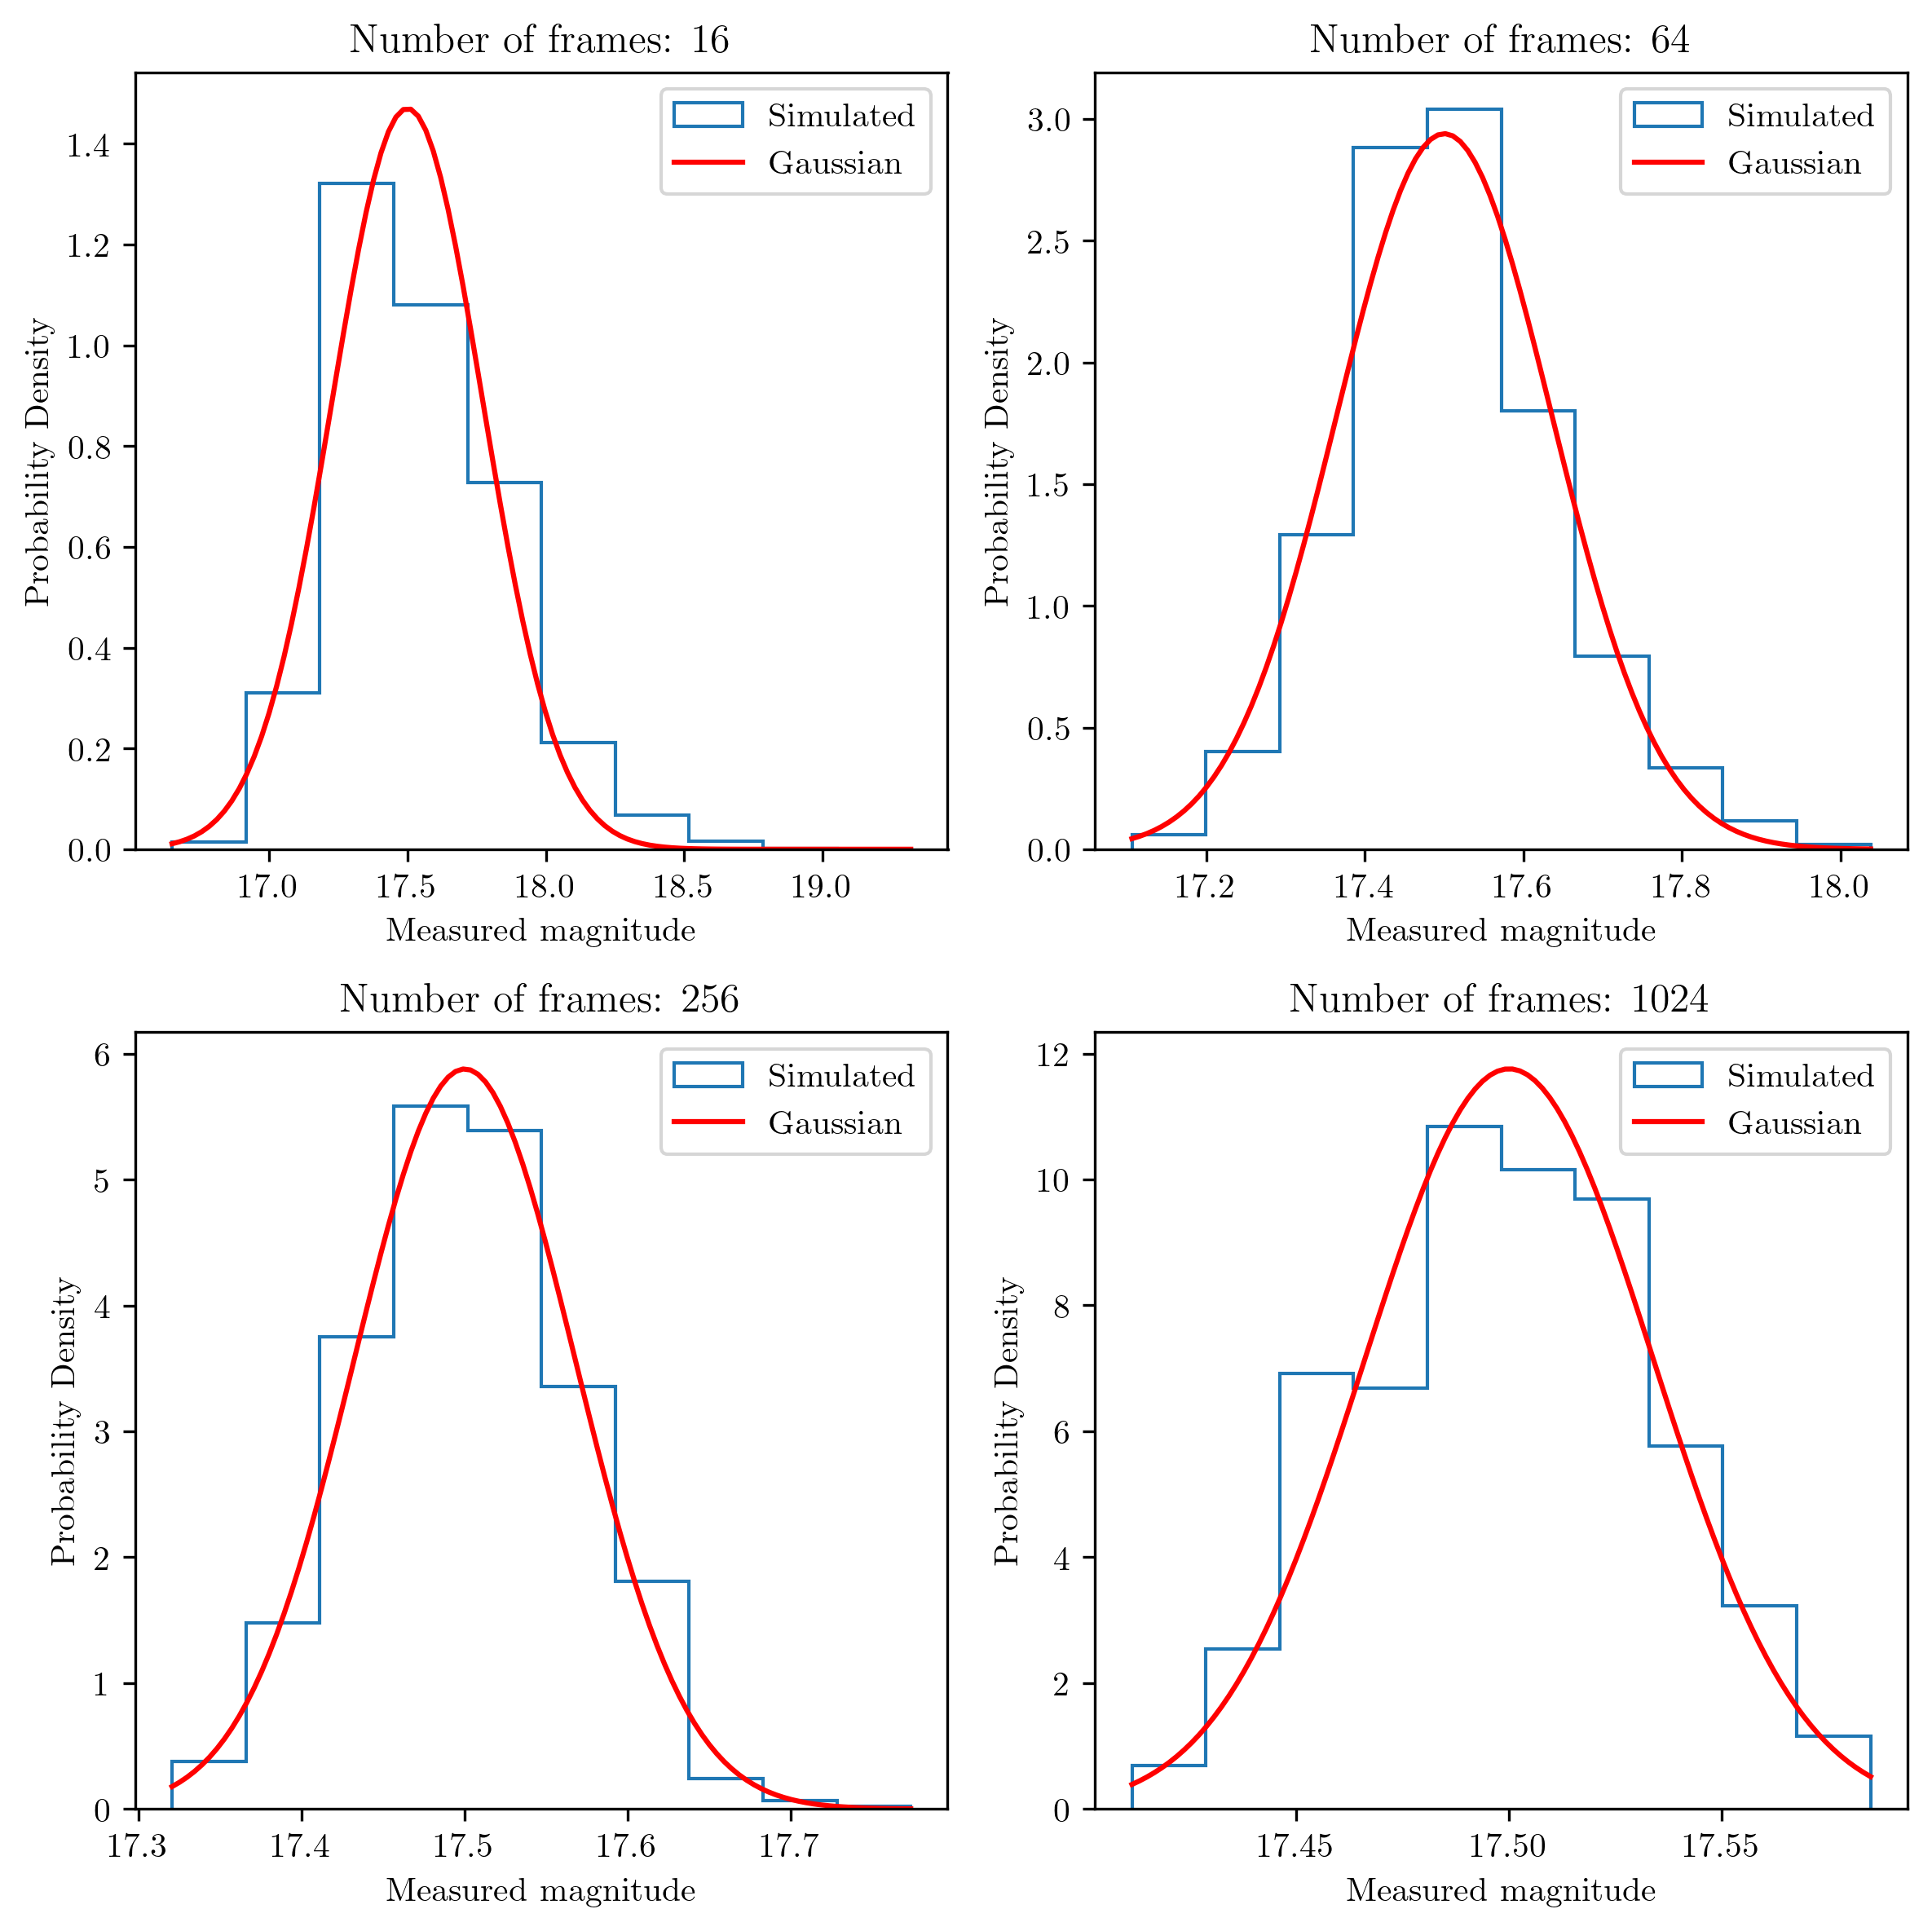

In [10]:
nframes = [16, 64, 256, 1024] # number of frames for the total exposure
fig = plt.figure(figsize = (8, 8))
axes = fig.subplots(2, 2).flatten()

for ax, n_fr in zip(axes, nframes):
    # Compute the average photon count over n_fr frames
    counts_mean = np.mean(num_photons.reshape(-1, n_fr), axis = 1)
    flux_measure = counts_mean / t_fr
    magnitude = -2.5 * np.log10(flux_measure) + 22.5
    _, bins, _ = ax.hist(
        magnitude, 
        histtype = 'step', 
        density = True, 
        label = 'Simulated'
    )

    # NOTE: EDIT BELOW to compute mu for the Gaussian overlay
    mu = -2.5 * np.log10(flux) + 22.5
    sigma = 2.5 / (np.log(10) * np.sqrt(flux * t_fr * n_fr))

    # Overlay the theoretical Gaussian distribution
    gauss_x = np.linspace(bins[0], bins[-1], 100)
    gauss_y = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((gauss_x - mu) / sigma) ** 2)
    ax.plot(
        gauss_x, 
        gauss_y, 
        'r-', 
        label = 'Gaussian'
    )
    ax.set_title(f'Number of frames: {n_fr}')
    ax.set_xlabel('Measured magnitude')
    ax.set_ylabel('Probability Density')
    ax.legend()

plt.tight_layout()

#### Question 2.3: Brightness with transient contamination

With small probability $\epsilon = 0.01$, a frame is hit by a bright transient (another source) with flux $\phi_{\rm trans} = 1000\,{\rm photon}\,{\rm s}^{-1}$.

**Tasks:**
1. Simulate the photon counts in 256,000 frames, with each frame having a probability $\epsilon$ of being contaminated by the transient source.
2. For multiple-frame exposures with $N_{\rm fr} = 1, 4, 16, 64, 256, 1024$, compute the measured brightness $\tilde{\phi}$ for each exposure. Plot the distribution of $\tilde{\phi}$ for each $N_{\rm fr}$.
3. Overlay a Gaussian distribution on each histogram, with the same mean and standard deviation as in Question 2.1.
4. Comment on what you observe.

In [11]:
flux_transient = 1000 # photon/s
epsilon = 0.01 # probability of transient contamination

# Simulate photon counts in each frame with possible transient contamination
rng = np.random.default_rng(seed)
num_photons = rng.poisson(flux * t_fr, size = nsamples)
is_contaminated = (rng.uniform(0, 1, size = nsamples) < epsilon).astype(int)
num_photons_with_transient = num_photons + is_contaminated * rng.poisson(flux_transient * t_fr, size = nsamples)

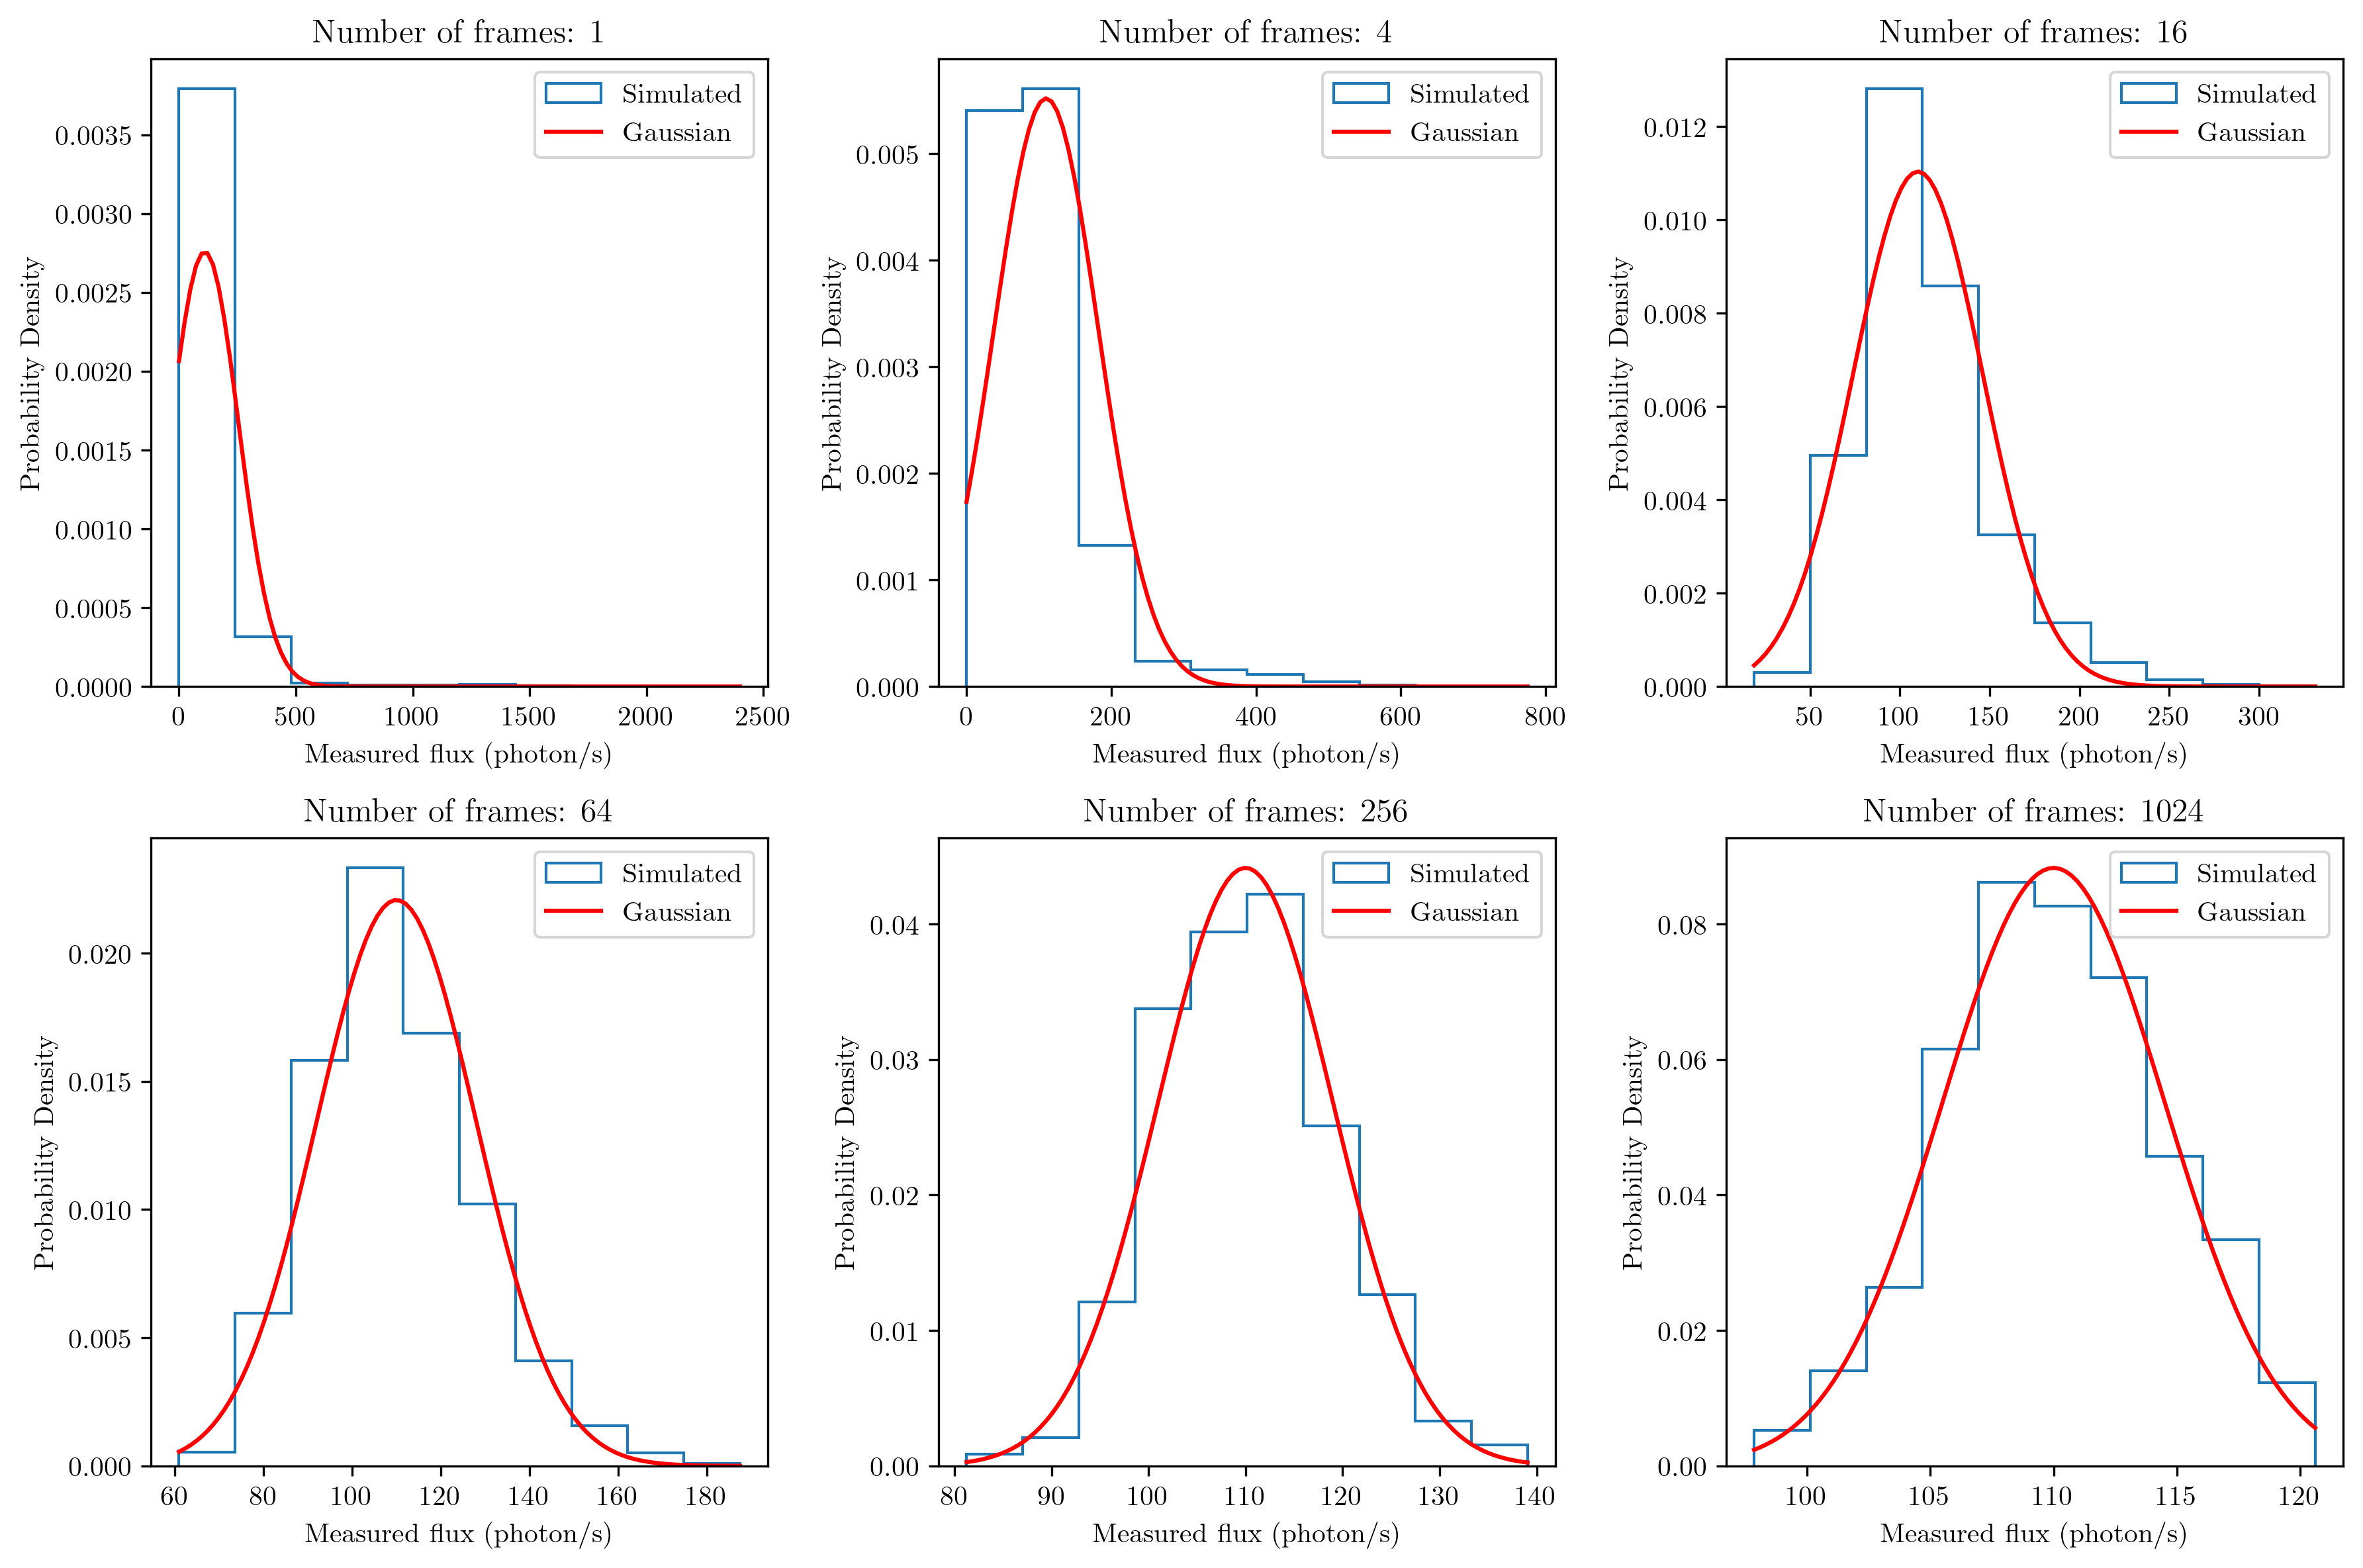

In [12]:
nframes = [1, 4, 16, 64, 256, 1024] # number of frames for the total exposure
fig = plt.figure(figsize = (12, 8))
axes = fig.subplots(2, 3).flatten()

for ax, n_fr in zip(axes, nframes):
    # Compute the average photon count over n_fr frames
    counts_mean = np.mean(num_photons_with_transient.reshape(-1, n_fr), axis = 1)
    flux_measure = counts_mean / t_fr
    _, bins, _ = ax.hist(
        flux_measure, 
        histtype = 'step', 
        density = True, 
        label = 'Simulated'
    )

    # NOTE: EDIT BELOW to compute mu and sigma for the Gaussian overlay
    # Theoretical mean and std for the measured flux with occasional transient contamination
    # Per-frame expectations:
    #   lambda_bg = flux * t_fr
    #   lambda_trans = flux_transient * t_fr
    # E[counts_per_frame] = lambda_bg + epsilon * lambda_trans
    # Var(counts_per_frame) = lambda_bg + epsilon*lambda_trans + (epsilon - epsilon**2) * lambda_trans**2
    # For averaging over n_fr frames, variance reduces by n_fr. Convert to flux (divide counts by t_fr).
    lambda_bg = flux * t_fr
    lambda_trans = flux_transient * t_fr
    mu = flux + epsilon * flux_transient # mean measured flux (photon/s)
    var_per_frame = lambda_bg + epsilon * lambda_trans + (epsilon - epsilon**2) * (lambda_trans ** 2)
    sigma = np.sqrt(var_per_frame / n_fr) / t_fr # std dev of measured flux (photon/s)

    # Overlay the theoretical Gaussian distribution
    gauss_x = np.linspace(bins[0], bins[-1], 100)
    gauss_y = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((gauss_x - mu) / sigma) ** 2)
    ax.plot(
        gauss_x,
        gauss_y, 
        'r-', 
        label = 'Gaussian'
    )
    ax.set_title(f'Number of frames: {n_fr}')
    ax.set_xlabel('Measured flux (photon/s)')
    ax.set_ylabel('Probability Density')
    ax.legend()

plt.tight_layout()

##### Discussions

在这里我们明显看到，不管是 Poisson 分布本身、Poisson 分布的参数变换、Poisson 分布的叠加，都满足在极限条件下趋向于 Gauss 分布的性质. 同时，我们看到 Poisson 分布的叠加仍然是 Poisson 分布.

#### Question 2.4: Brightness with cosmic-ray contamination (advanced)

With small probability $\epsilon = 0.01$, a frame is hit by a cosmic ray, which adds a random number of photons drawn from a power-law (Pareto) distribution with index $\alpha = 1.5$ and minimum value $x_m = 10$ (do not take the distribution seriously, I made it up for the exercise):

$$p(x) = \frac{\alpha x_m^\alpha}{x^{\alpha + 1}}, \quad x \geq x_m$$

**Tasks:**
1. Simulate the photon counts in 256,000 frames using 2 different random seeds, with each frame having a probability $\epsilon$ of being contaminated by a cosmic ray.
2. For multiple-frame exposures with $N_{\rm fr} = 1, 4, 16, 64, 256, 1024$, compute the measured brightness $\tilde{\phi}$ for each exposure. Plot the distribution of $\tilde{\phi}$ for each $N_{\rm fr}$ for both random seeds.
3. Comment on what you observe.

**Hint:** The Pareto distribution with parameters $\alpha$ and $x_m$ can be sampled using: `rng.pareto(a=alpha, size=1) * x_m + x_m`.

In [13]:
epsilon = 0.01 # probability of cosmic-ray contamination
pareto_alpha = 1.5 # shape parameter for Pareto distribution
pareto_xm = 10 # minimum value for Pareto distribution

# Simulate photon counts in each frame with possible cosmic-ray contamination
rng = np.random.default_rng(seed)
num_photons = rng.poisson(flux * t_fr, size = nsamples)
is_contaminated = (rng.uniform(0, 1, size = nsamples) < epsilon).astype(int)
# NOTE: EDIT HERE to add Pareto-distributed contamination
num_photons_with_cr_1 = num_photons + is_contaminated * (rng.pareto(pareto_alpha, size = nsamples) * pareto_xm + pareto_xm)

# Run another simulation with random seed 42
rng = np.random.default_rng(42)
num_photons = rng.poisson(flux * t_fr, size = nsamples)
is_contaminated = (rng.uniform(0, 1, size = nsamples) < epsilon).astype(int)
# NOTE: EDIT HERE to add Pareto-distributed contamination
num_photons_with_cr_2 = num_photons + is_contaminated * (rng.pareto(pareto_alpha, size = nsamples) * pareto_xm + pareto_xm)

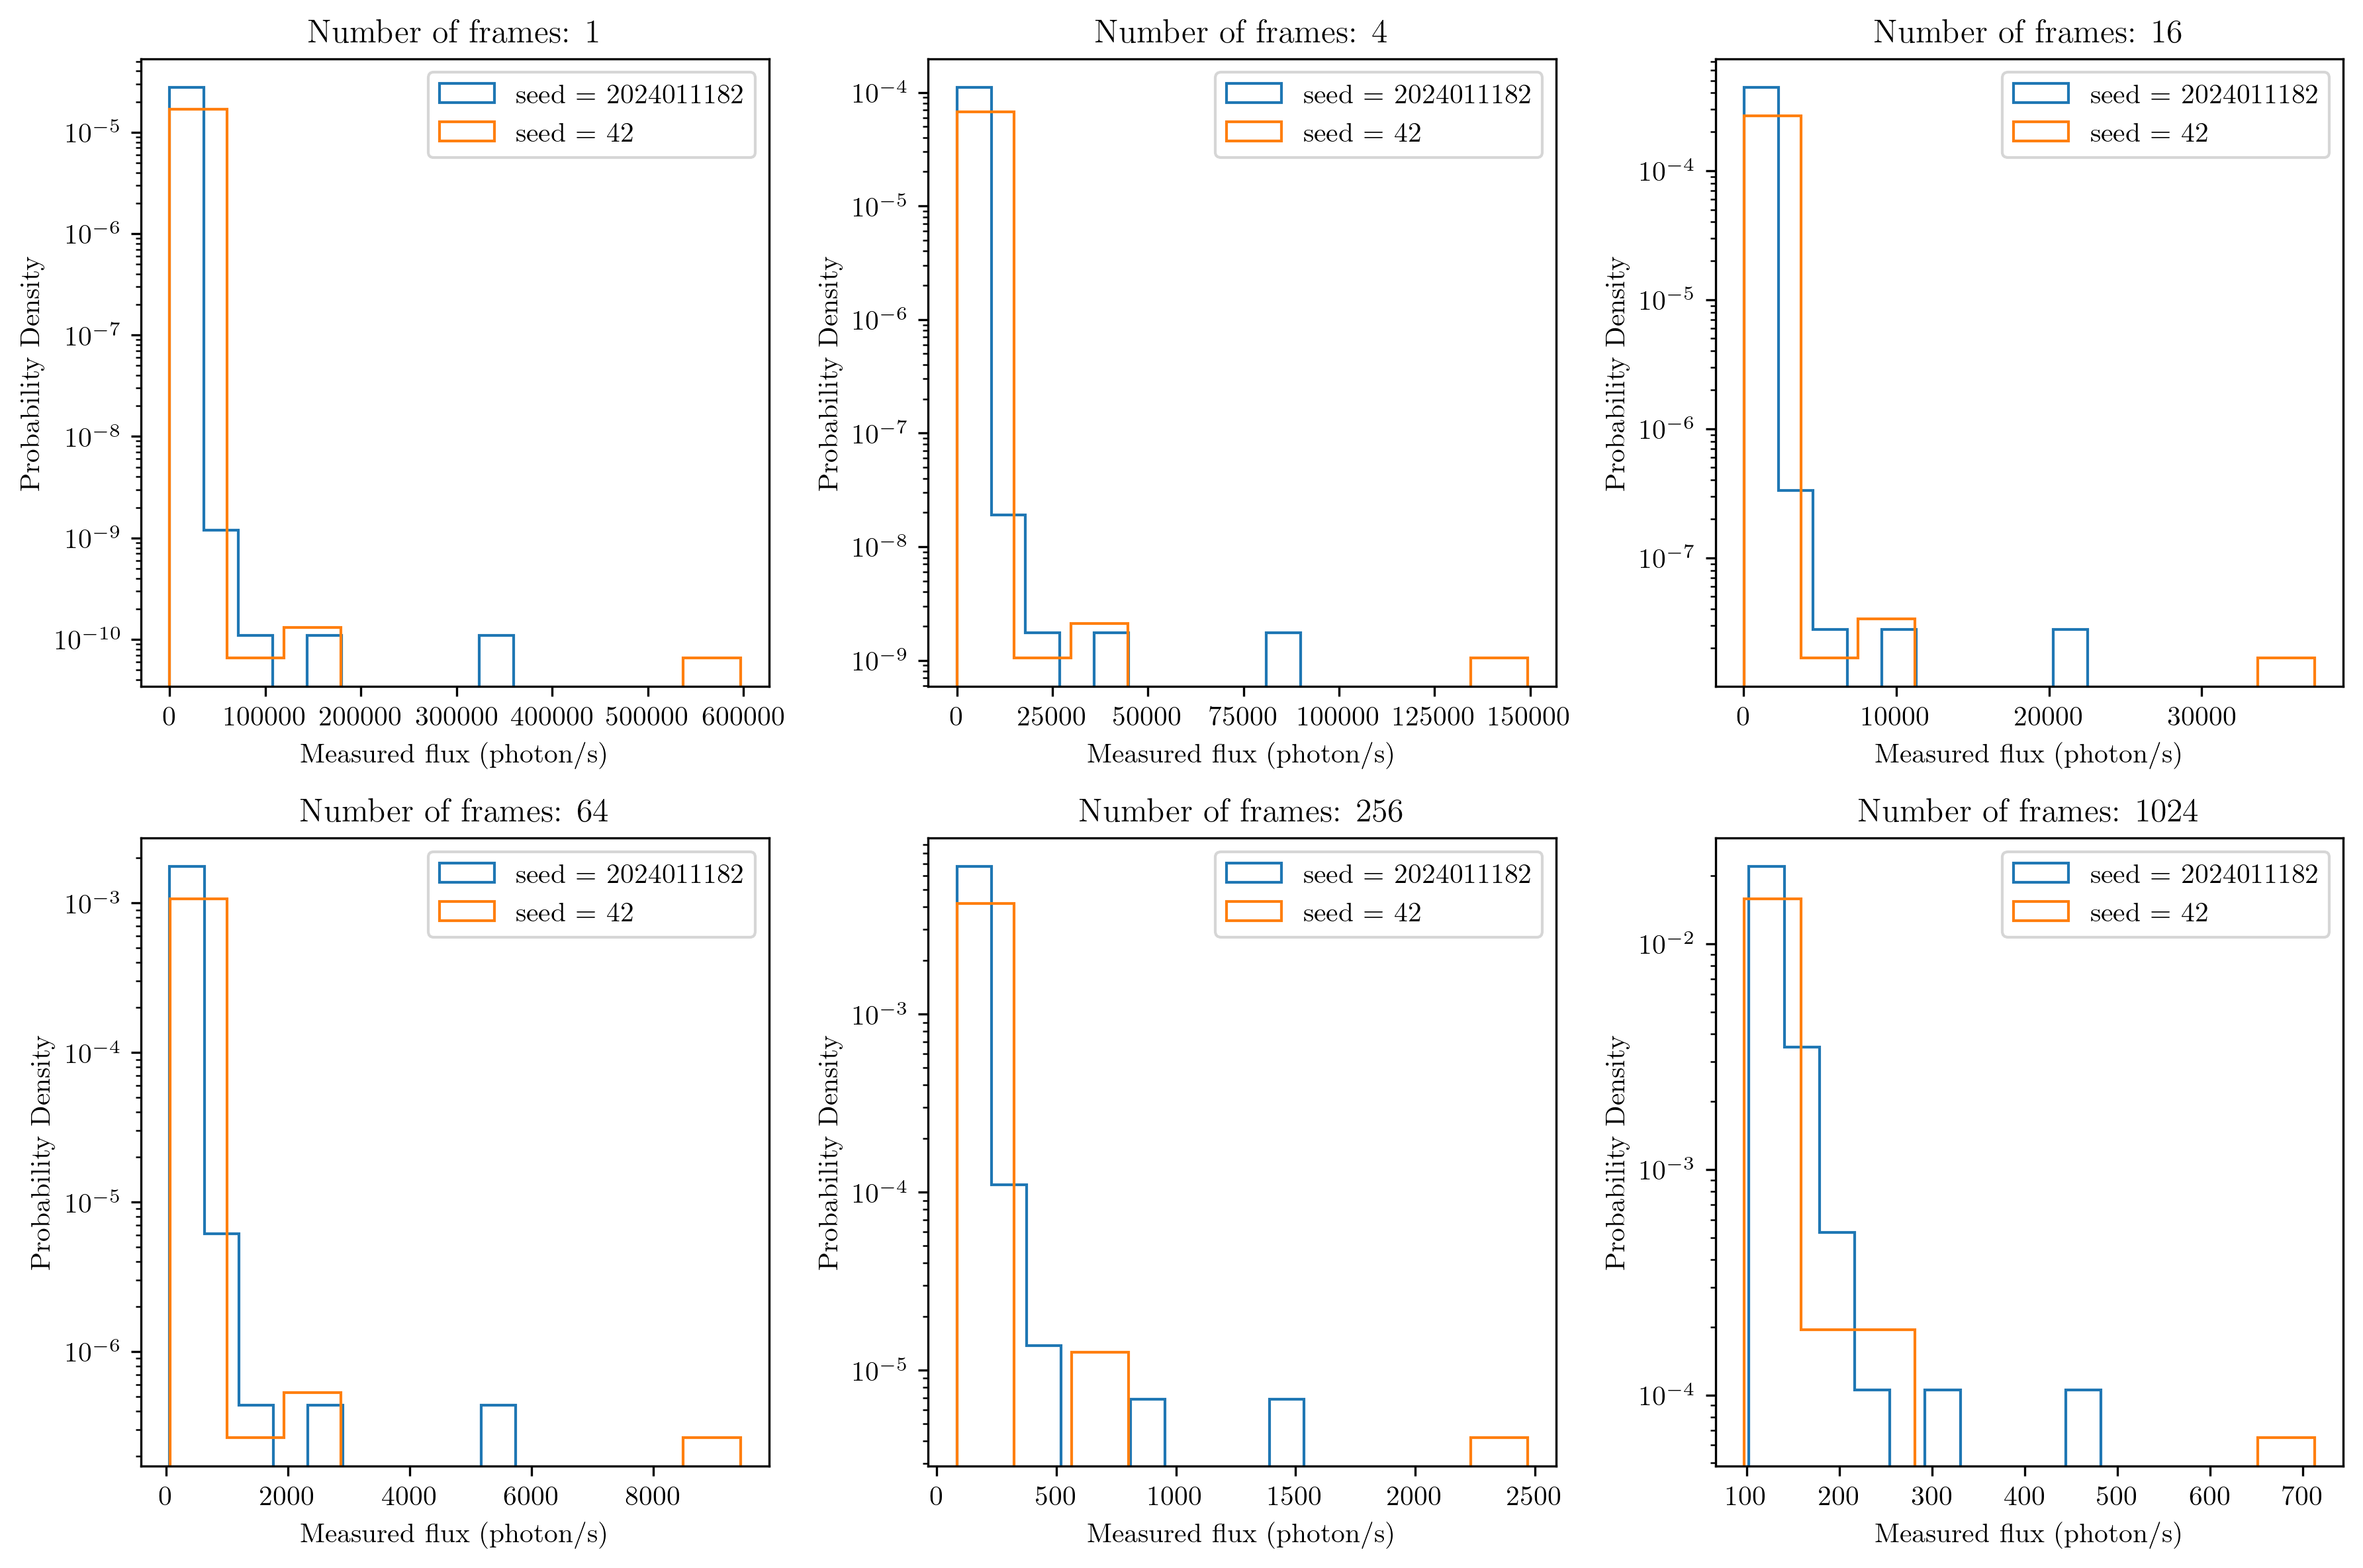

In [14]:
nframes = [1, 4, 16, 64, 256, 1024] # number of frames for the total exposure
fig = plt.figure(figsize = (12, 8))
axes = fig.subplots(2, 3).flatten()

for ax, n_fr in zip(axes, nframes):
    # Compute the average photon count over n_fr frames
    counts_mean = np.mean(num_photons_with_cr_1.reshape(-1, n_fr), axis = 1)
    flux_measure = counts_mean / t_fr
    ax.hist(
        flux_measure, 
        histtype = 'step', 
        density = True, 
        label = f'seed = {seed}'
    )

    counts_mean = np.mean(num_photons_with_cr_2.reshape(-1, n_fr), axis = 1)
    flux_measure = counts_mean / t_fr
    ax.hist(
        flux_measure, 
        histtype = 'step', 
        density = True, 
        label = 'seed = 42'
    )

    ax.set_yscale('log')
    ax.set_title(f'Number of frames: {n_fr}')
    ax.set_xlabel('Measured flux (photon/s)')
    ax.set_ylabel('Probability Density')
    ax.legend()

plt.tight_layout()

##### Discussions

不同种子生成的两组数据图像类似，而且都在数据量更大的情况下体现出更平缓的特征.

### Exercise 3: Toy universe

Build a spherical *toy universe* of radius $R=1$ in Euclidean 3D space. Assume a coherent unit system (you may omit units). The universe is uniformly filled with stars (constant number density), and the observer is at the center (the origin).

#### Question 3.1: Radial distribution of stars

Generate $N=10,000$ stars uniformly distributed in the universe. There are two sampling methods:
1. Draw Cartesian coordinates $(x,y,z)$ uniformly in the cube $(-1,1)^3$ and reject points outside the unit sphere.
2. Sample the spherical coordinates $(r, \theta, \phi)$ directly.

**Tasks:**
1. Generate Cartesian coordinates of $N$ stars. How many uniform random numbers do you actually consume and how is your acceptance rate compared to the theoretical expectation?
2. Plot the histogram of the distances of the stars from the origin ($r$) and overlay the theoretical distribution of distances.
3. Since the universe is isotropic and we only care about the **radial** distribution, sample just $r$ using the variable transformation method. Validate that the sampled $r$ matches the theoretical distribution.
4. For both datasets (from tasks 1 and 3), validate uniformity of stellar distribution by plotting the radial number density in concentric spherical shells with equal thickness, and overlaying the theoretical expectation.

In [15]:
# Set the random seed
seed = 2024011182 # NOTE: EDIT HERE to insert your seed as the seed

nstars = 10000 # Number of stars to sample
nsamples = 10 * nstars # Number of samples to draw at once

rng = np.random.default_rng(seed)

# Sample uniform Cartesian coordinates
x = rng.uniform(-1, 1, size = nsamples)
y = rng.uniform(-1, 1, size = nsamples)
z = rng.uniform(-1, 1, size = nsamples)

# Reject points outside the unit sphere
r = np.sqrt(x**2 + y**2 + z**2)
mask = (r < 1)
r = r[mask][:nstars] # Keep only the first N stars

# Compute the acceptance ratio upon 10000 stars being accepted
accept_index = np.flatnonzero(mask)
used_index = accept_index[nstars - 1] + 1
random_draws = used_index * 3  # 3 coordinates per star
acceptance_ratio = nstars / random_draws
# NOTE: EDIT HERE to compute the theoretical acceptance ratio
acceptance_ratio_theory = (4 * np.pi / 3) / (2**3)

print(f"Acceptance ratio: {acceptance_ratio:.4%}")
print(f"Theoretical acceptance ratio: {acceptance_ratio_theory:.4%}")

Acceptance ratio: 17.4438%
Theoretical acceptance ratio: 52.3599%


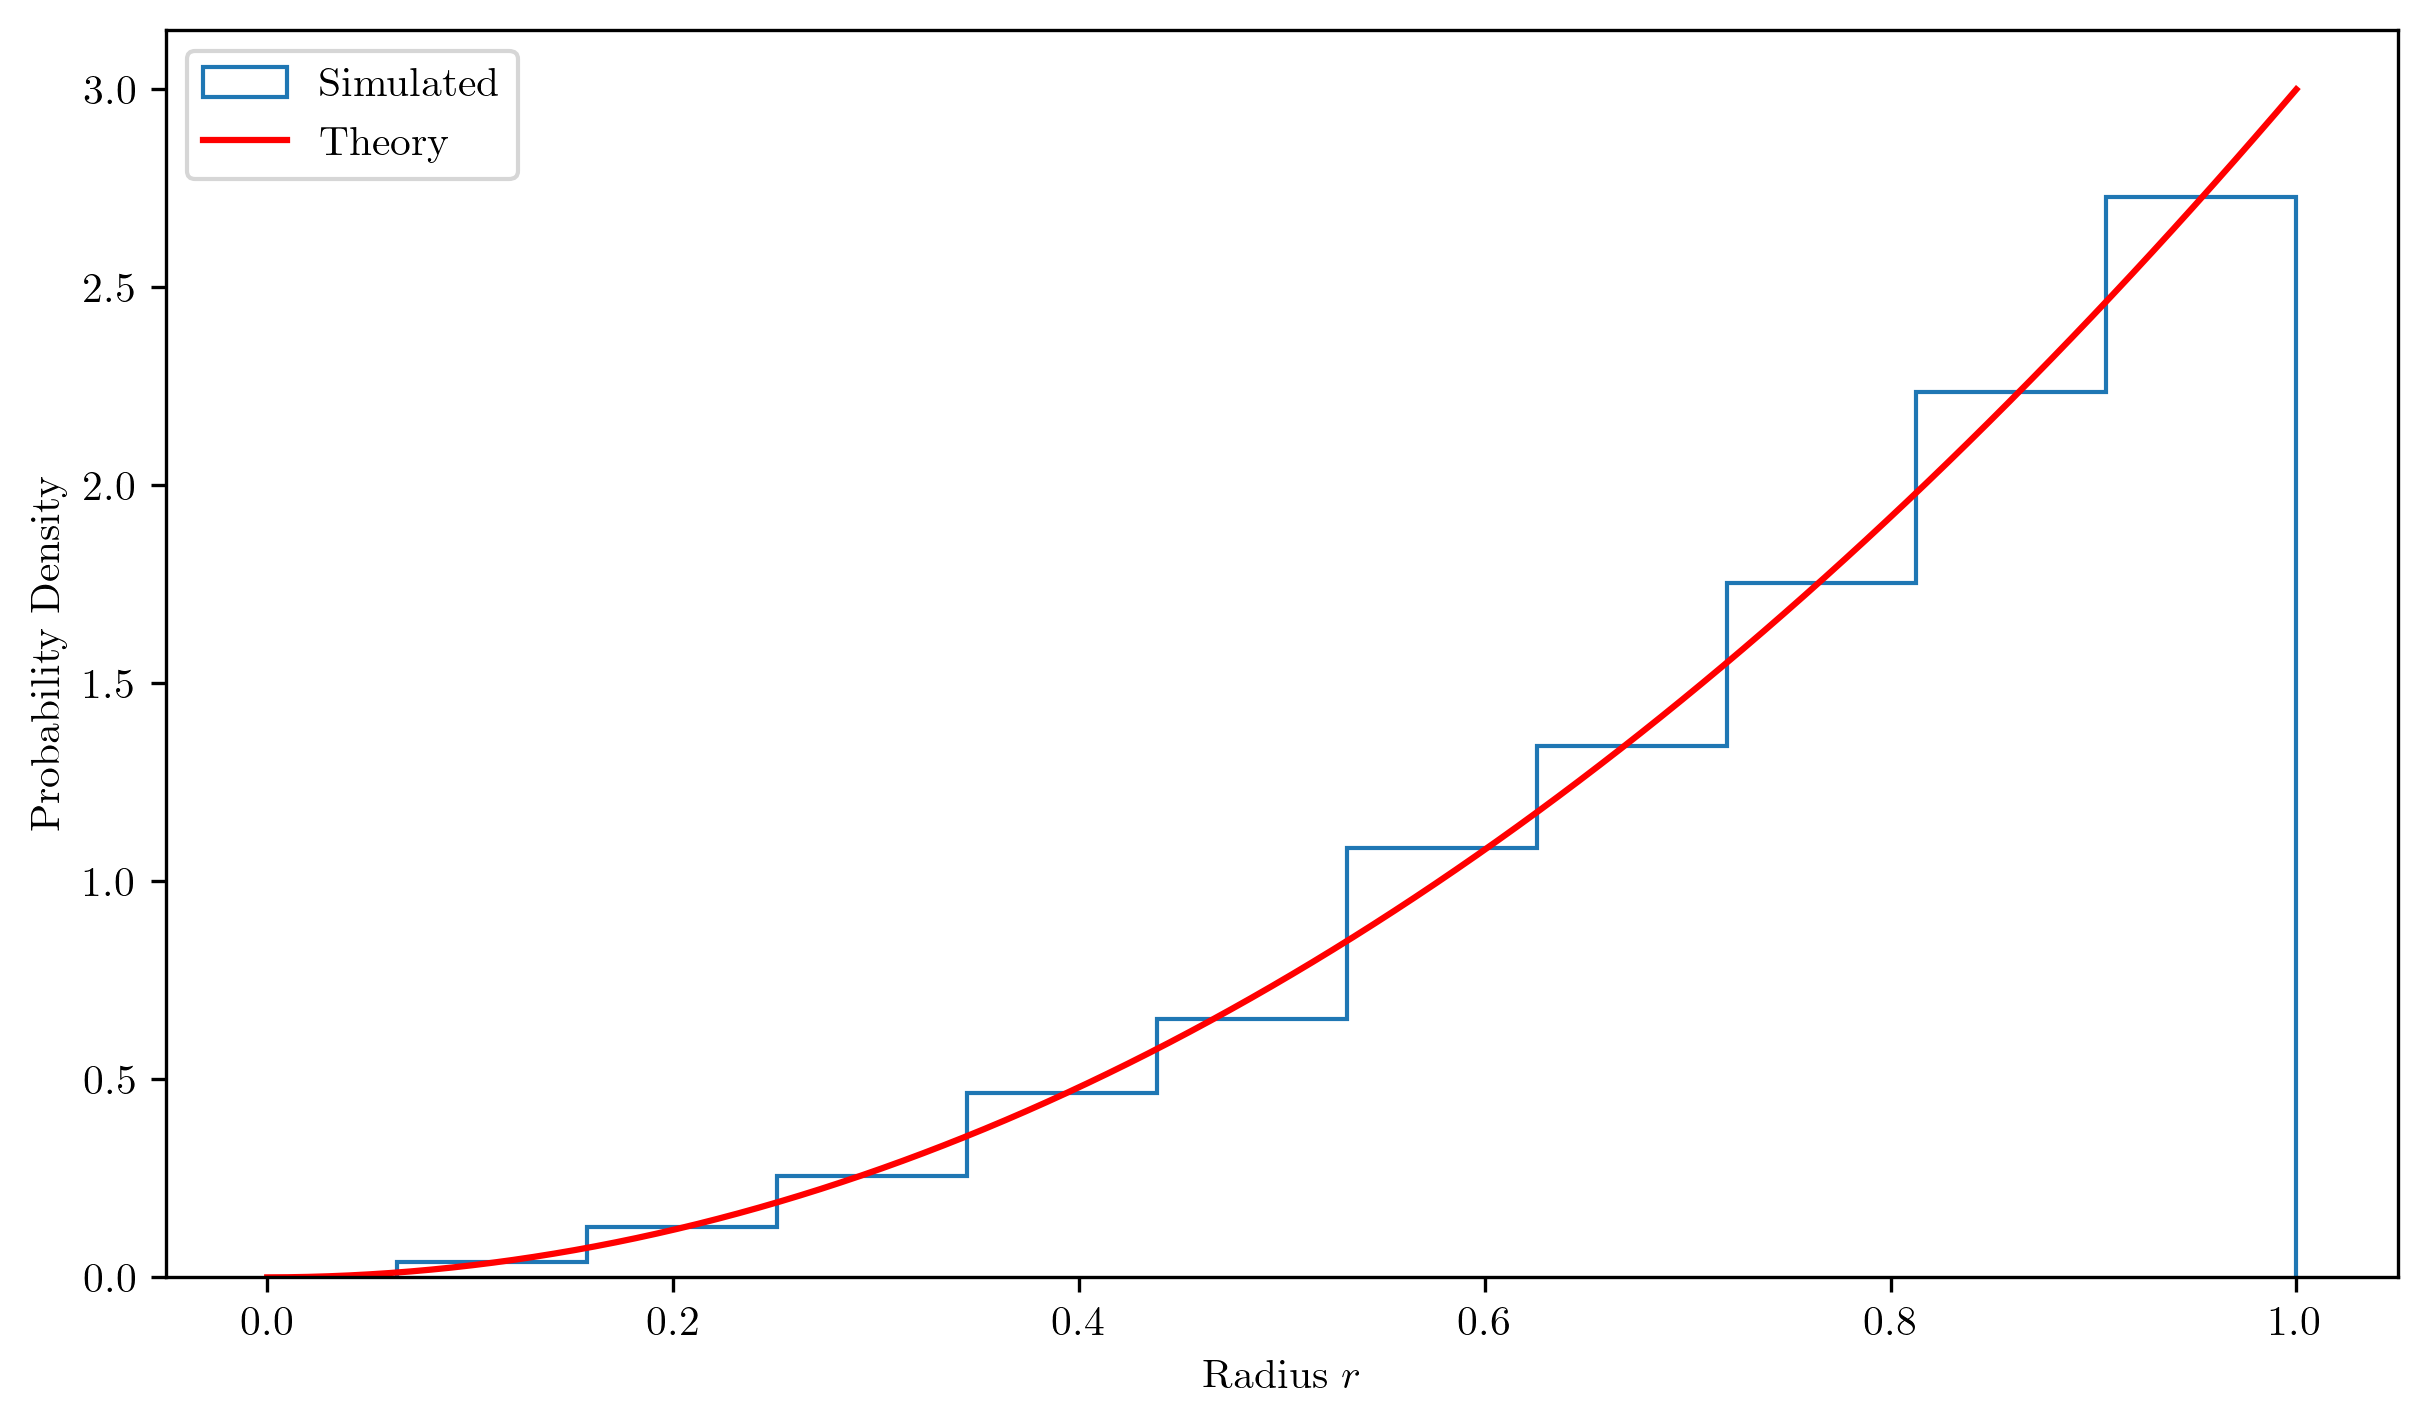

In [16]:
# Plot the histogram of r
plt.hist(
    r, 
    histtype = 'step',
    density = True,
    label = 'Simulated'
)

# Overlay the theoretical distribution
r_theory = np.linspace(0, 1, 100)
# NOTE: EDIT HERE to compute the theoretical PDF of r
p_r_theory = 3 * r_theory**2
plt.plot(
    r_theory,
    p_r_theory,
    'r-', 
    label = 'Theory'
)

plt.xlabel('Radius $r$')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

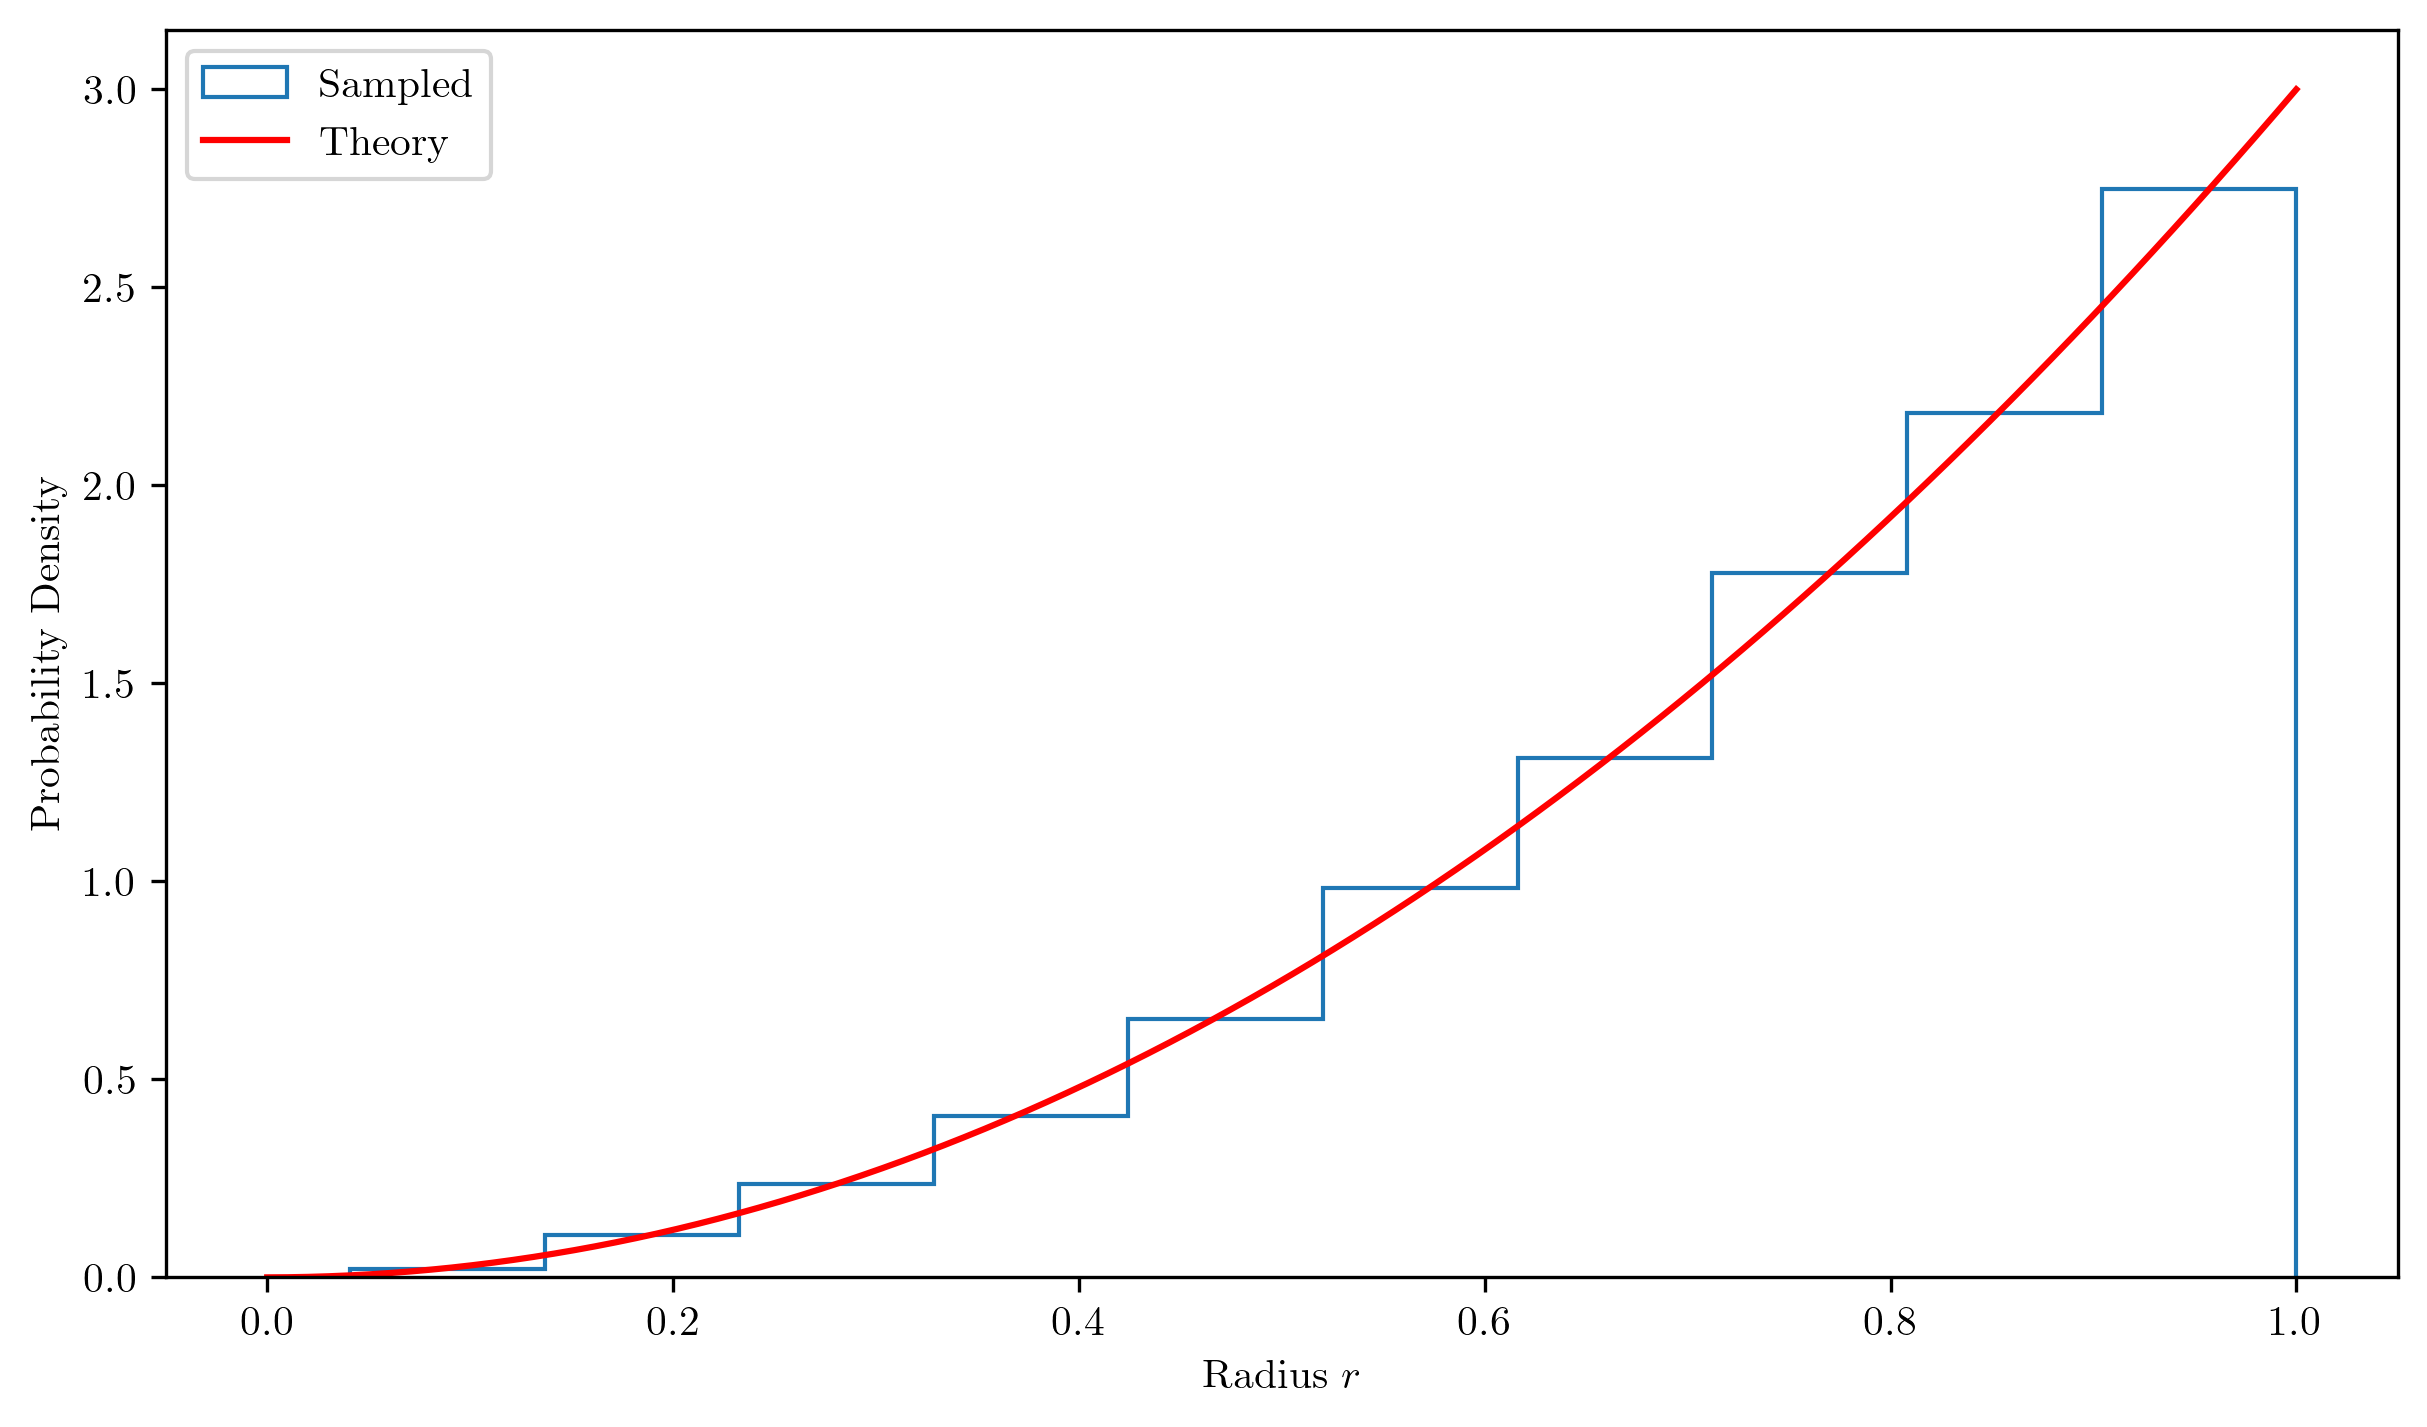

In [17]:
# Sample r from the theoretical distribution directly
rng = np.random.default_rng(seed)
u = rng.uniform(0, 1, size = nstars) 
# NOTE: EDIT HERE to compute r from u
r_sampled = u**(1/3)

# Validate that the sampled r matches the theoretical distribution
plt.hist(
    r_sampled,
    histtype = 'step',
    density = True,
    label = 'Sampled'
)
plt.plot(
    r_theory,
    p_r_theory,
    'r-',
    label = 'Theory'
)

plt.xlabel('Radius $r$')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

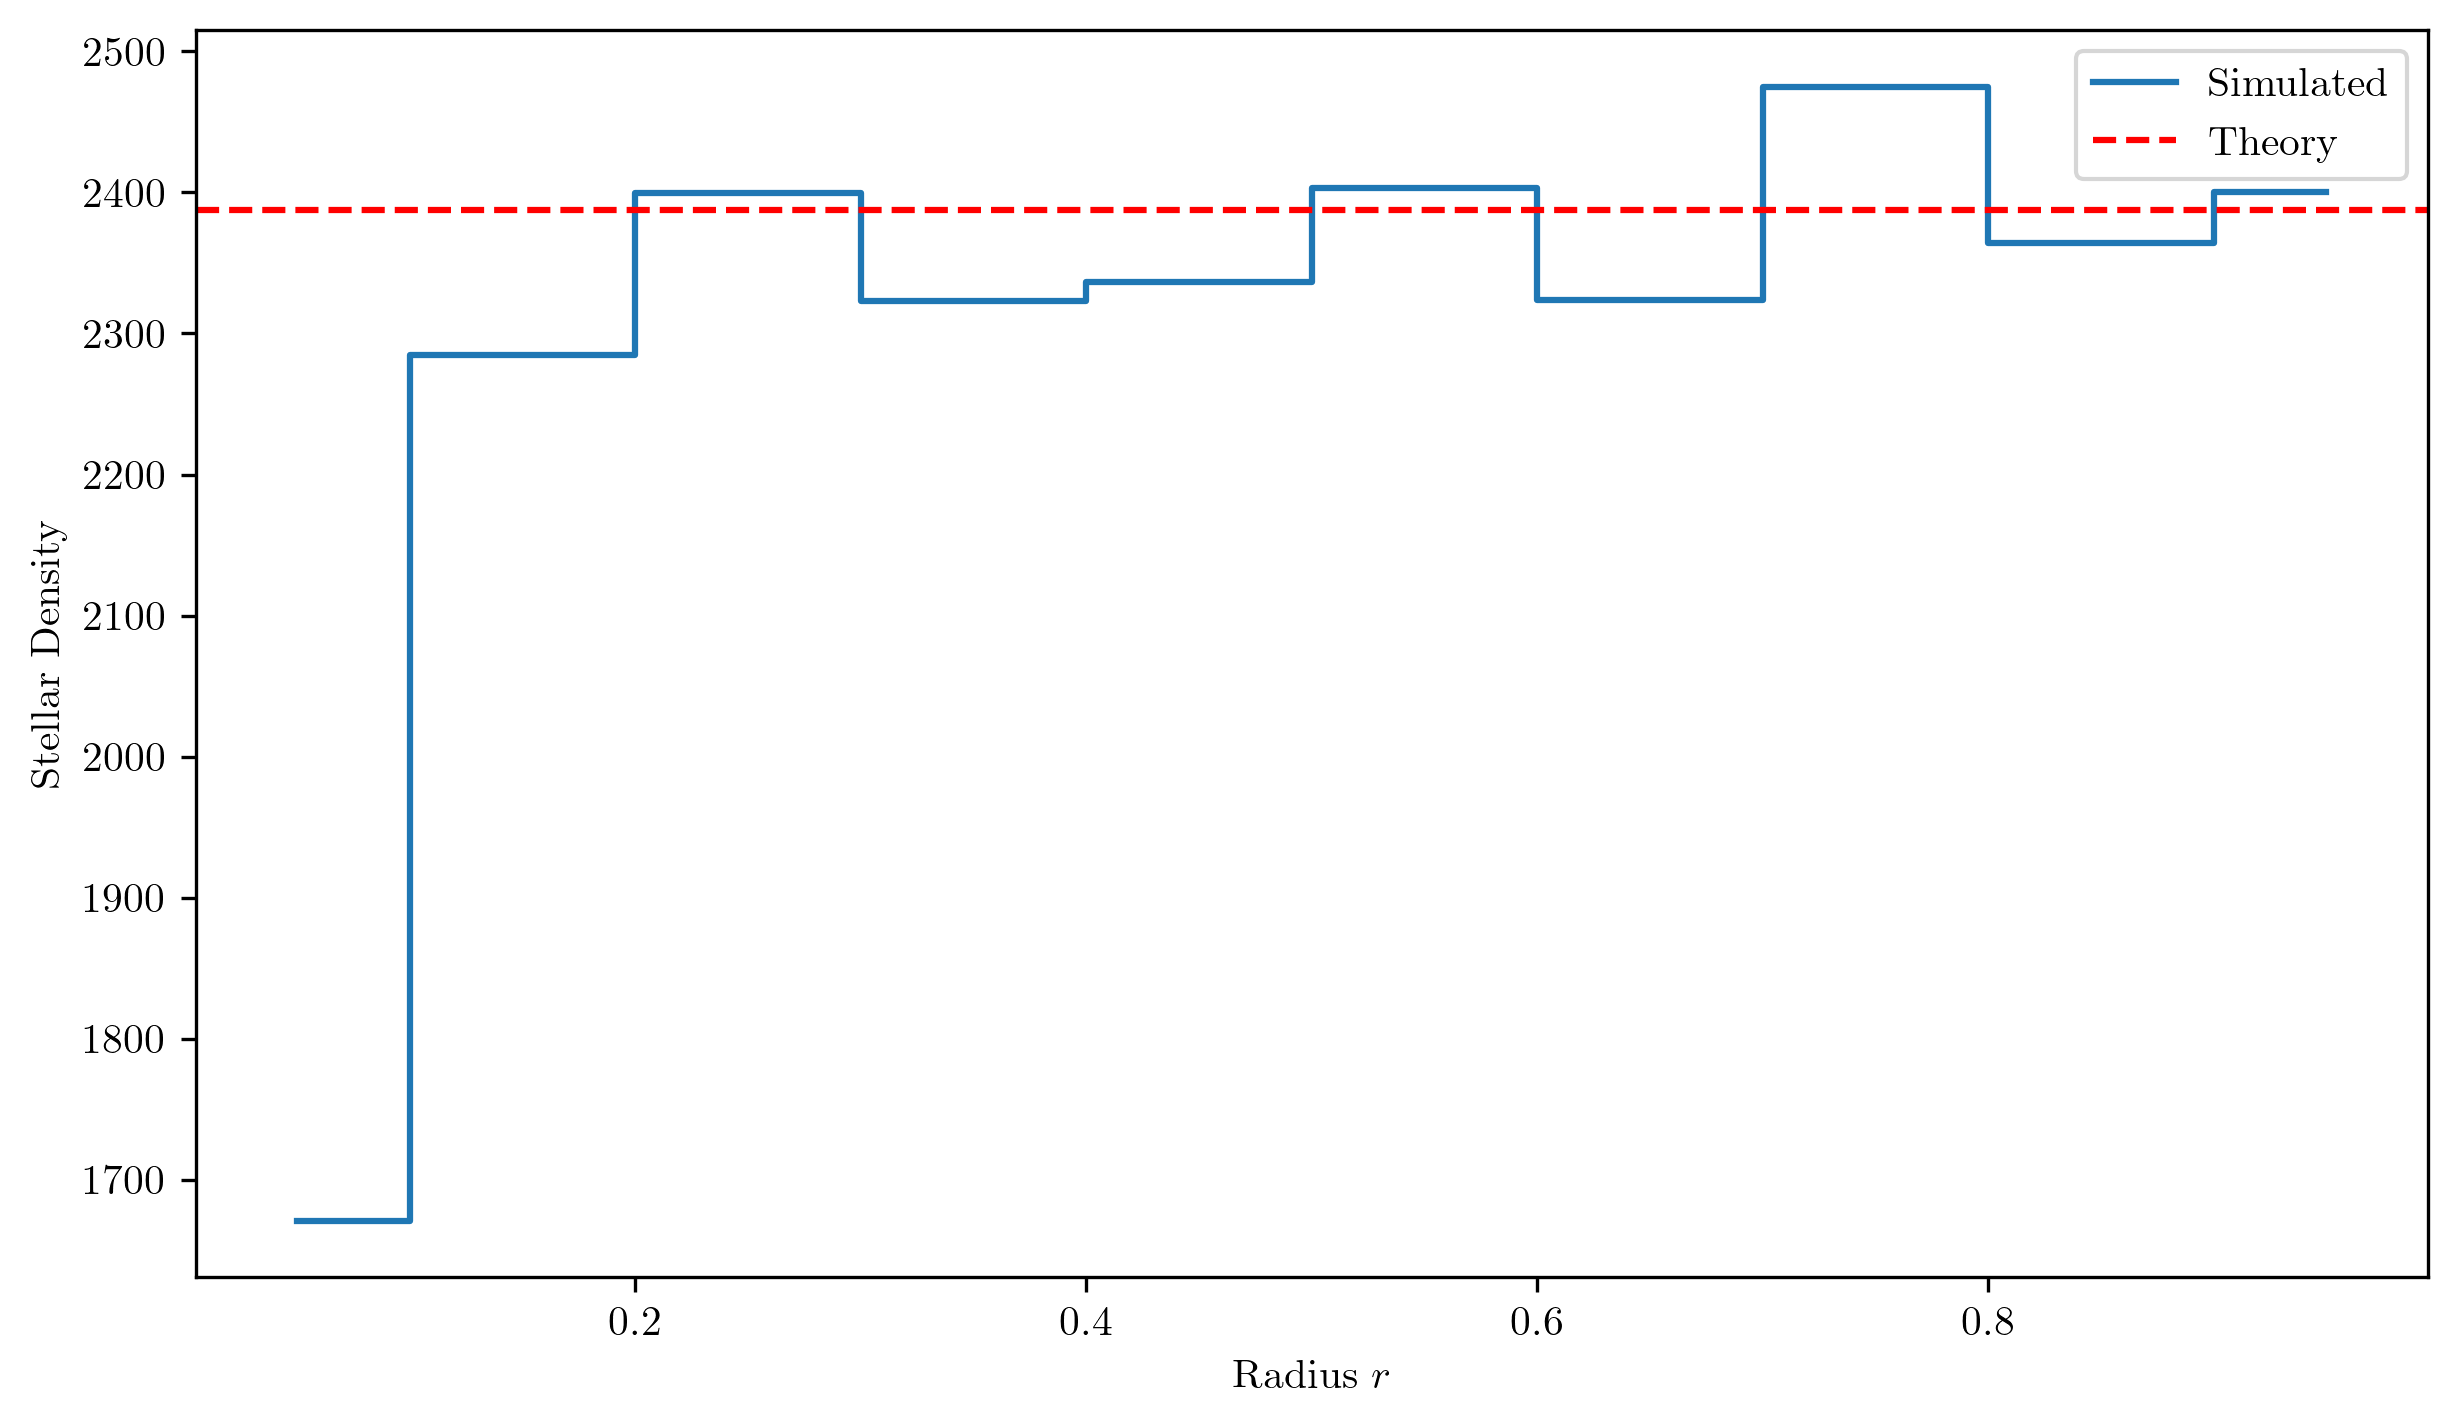

In [18]:
# Define spherical shells with equal thickness
r_edges = np.linspace(0, 1, 11) # 10 shells
r_centers = 0.5 * (r_edges[:-1] + r_edges[1:])
shell_volumes = (4/3) * np.pi * (r_edges[1:]**3 - r_edges[:-1]**3)

# Compute counts in each shell from the sampled radii and estimate Poisson errors
shell_counts, _ = np.histogram(r_sampled, bins = r_edges)
shell_densities = shell_counts / shell_volumes

plt.step(r_centers, shell_densities, where = 'mid', label = 'Simulated')

# Overlay the theoretical constant density
density_theory = nstars / (4 * np.pi / 3)
plt.axhline(
    density_theory,
    color = 'r',
    linestyle = '--',
    label = 'Theory'
)

plt.xlabel('Radius $r$')
plt.ylabel('Stellar Density')
plt.legend()
plt.show()

#### Question 3.2: Distribution of stellar counts and densities

**Tasks:**
1. Rerun the simulation in Question 3.1 with 1000 different random seeds, each time generating $N=10,000$ stars using the variable transformation method.
2. For each simulation, count stars within radius $r < 0.8$. Plot the distribution of counts and overlay Binomial and Poisson distributions with appropriate parameters.
3. Count stars within $r < 0.1$. Plot the distribution of stellar counts over the 1000 simulations, and overlay Binomial and Poisson distributions with appropriate parameters.
4. Given your observations from tasks 2 and 3, replot the stellar density distribution in spherical shells from Question 3.1 with appropriate error bars. Comment on your results.

In [19]:
seeds = [seed + i for i in range(1000)] # Different seeds based on seed
r_samples = []

# Simulate the toy universe with different seeds
for s in seeds:
    rng = np.random.default_rng(s)
    u = rng.uniform(0, 1, size = nstars)
    # NOTE: EDIT HERE to compute r from u
    r = u**(1/3)
    r_samples.append(r)

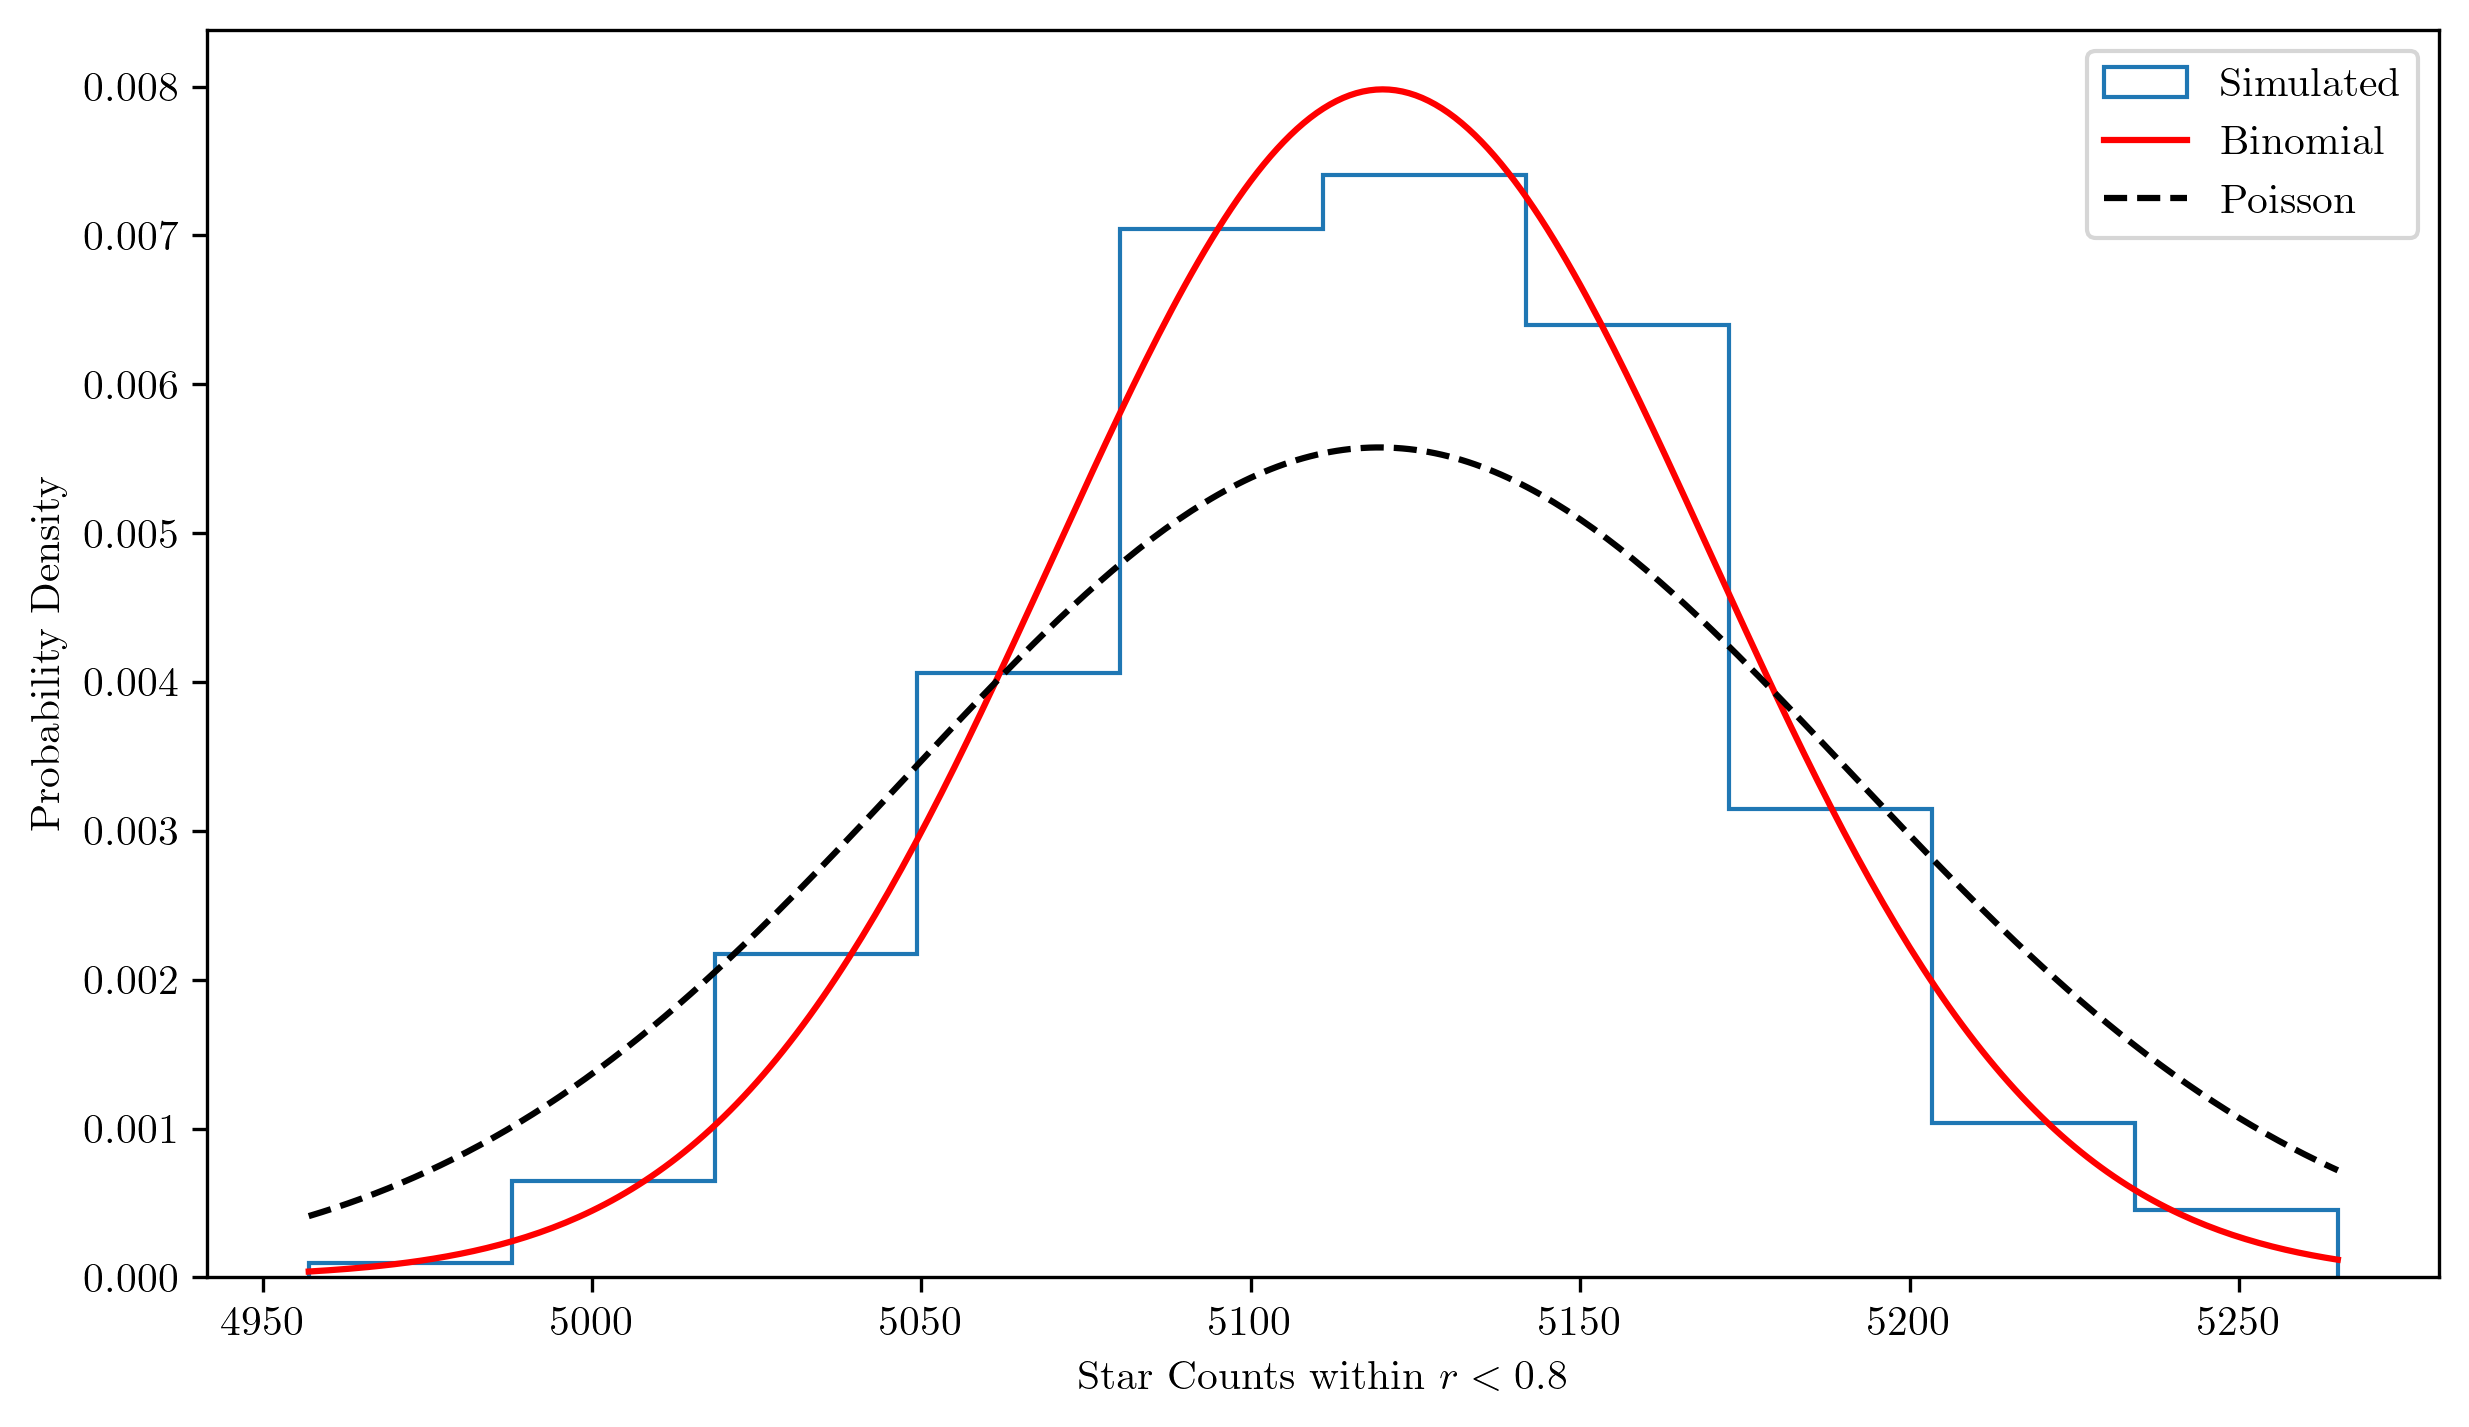

In [20]:
from scipy.stats import binom, poisson

# Count stars within r < 0.8
r_thres_1 = 0.8
counts_1 = [np.sum(r < r_thres_1) for r in r_samples]

# Plot the histogram of counts within r < 0.8
bins_1 = np.arange(min(counts_1), max(counts_1) + 1)
plt.hist(
    counts_1,
    histtype = 'step',
    density = True,
    label = 'Simulated'
)

# Overlay Binomial and Poisson distributions
# NOTE: EDIT HERE to complete the Binomial parameters
pdf_binom_1 = binom.pmf(bins_1, nstars, r_thres_1**3)
# NOTE: EDIT HERE to complete the Poisson parameter
pdf_poisson_1 = poisson.pmf(bins_1, nstars * r_thres_1**3)
plt.plot(bins_1, pdf_binom_1, 'r-', label = 'Binomial')
plt.plot(bins_1, pdf_poisson_1, 'k--', label = 'Poisson')

plt.xlabel('Star Counts within $r < 0.8$')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

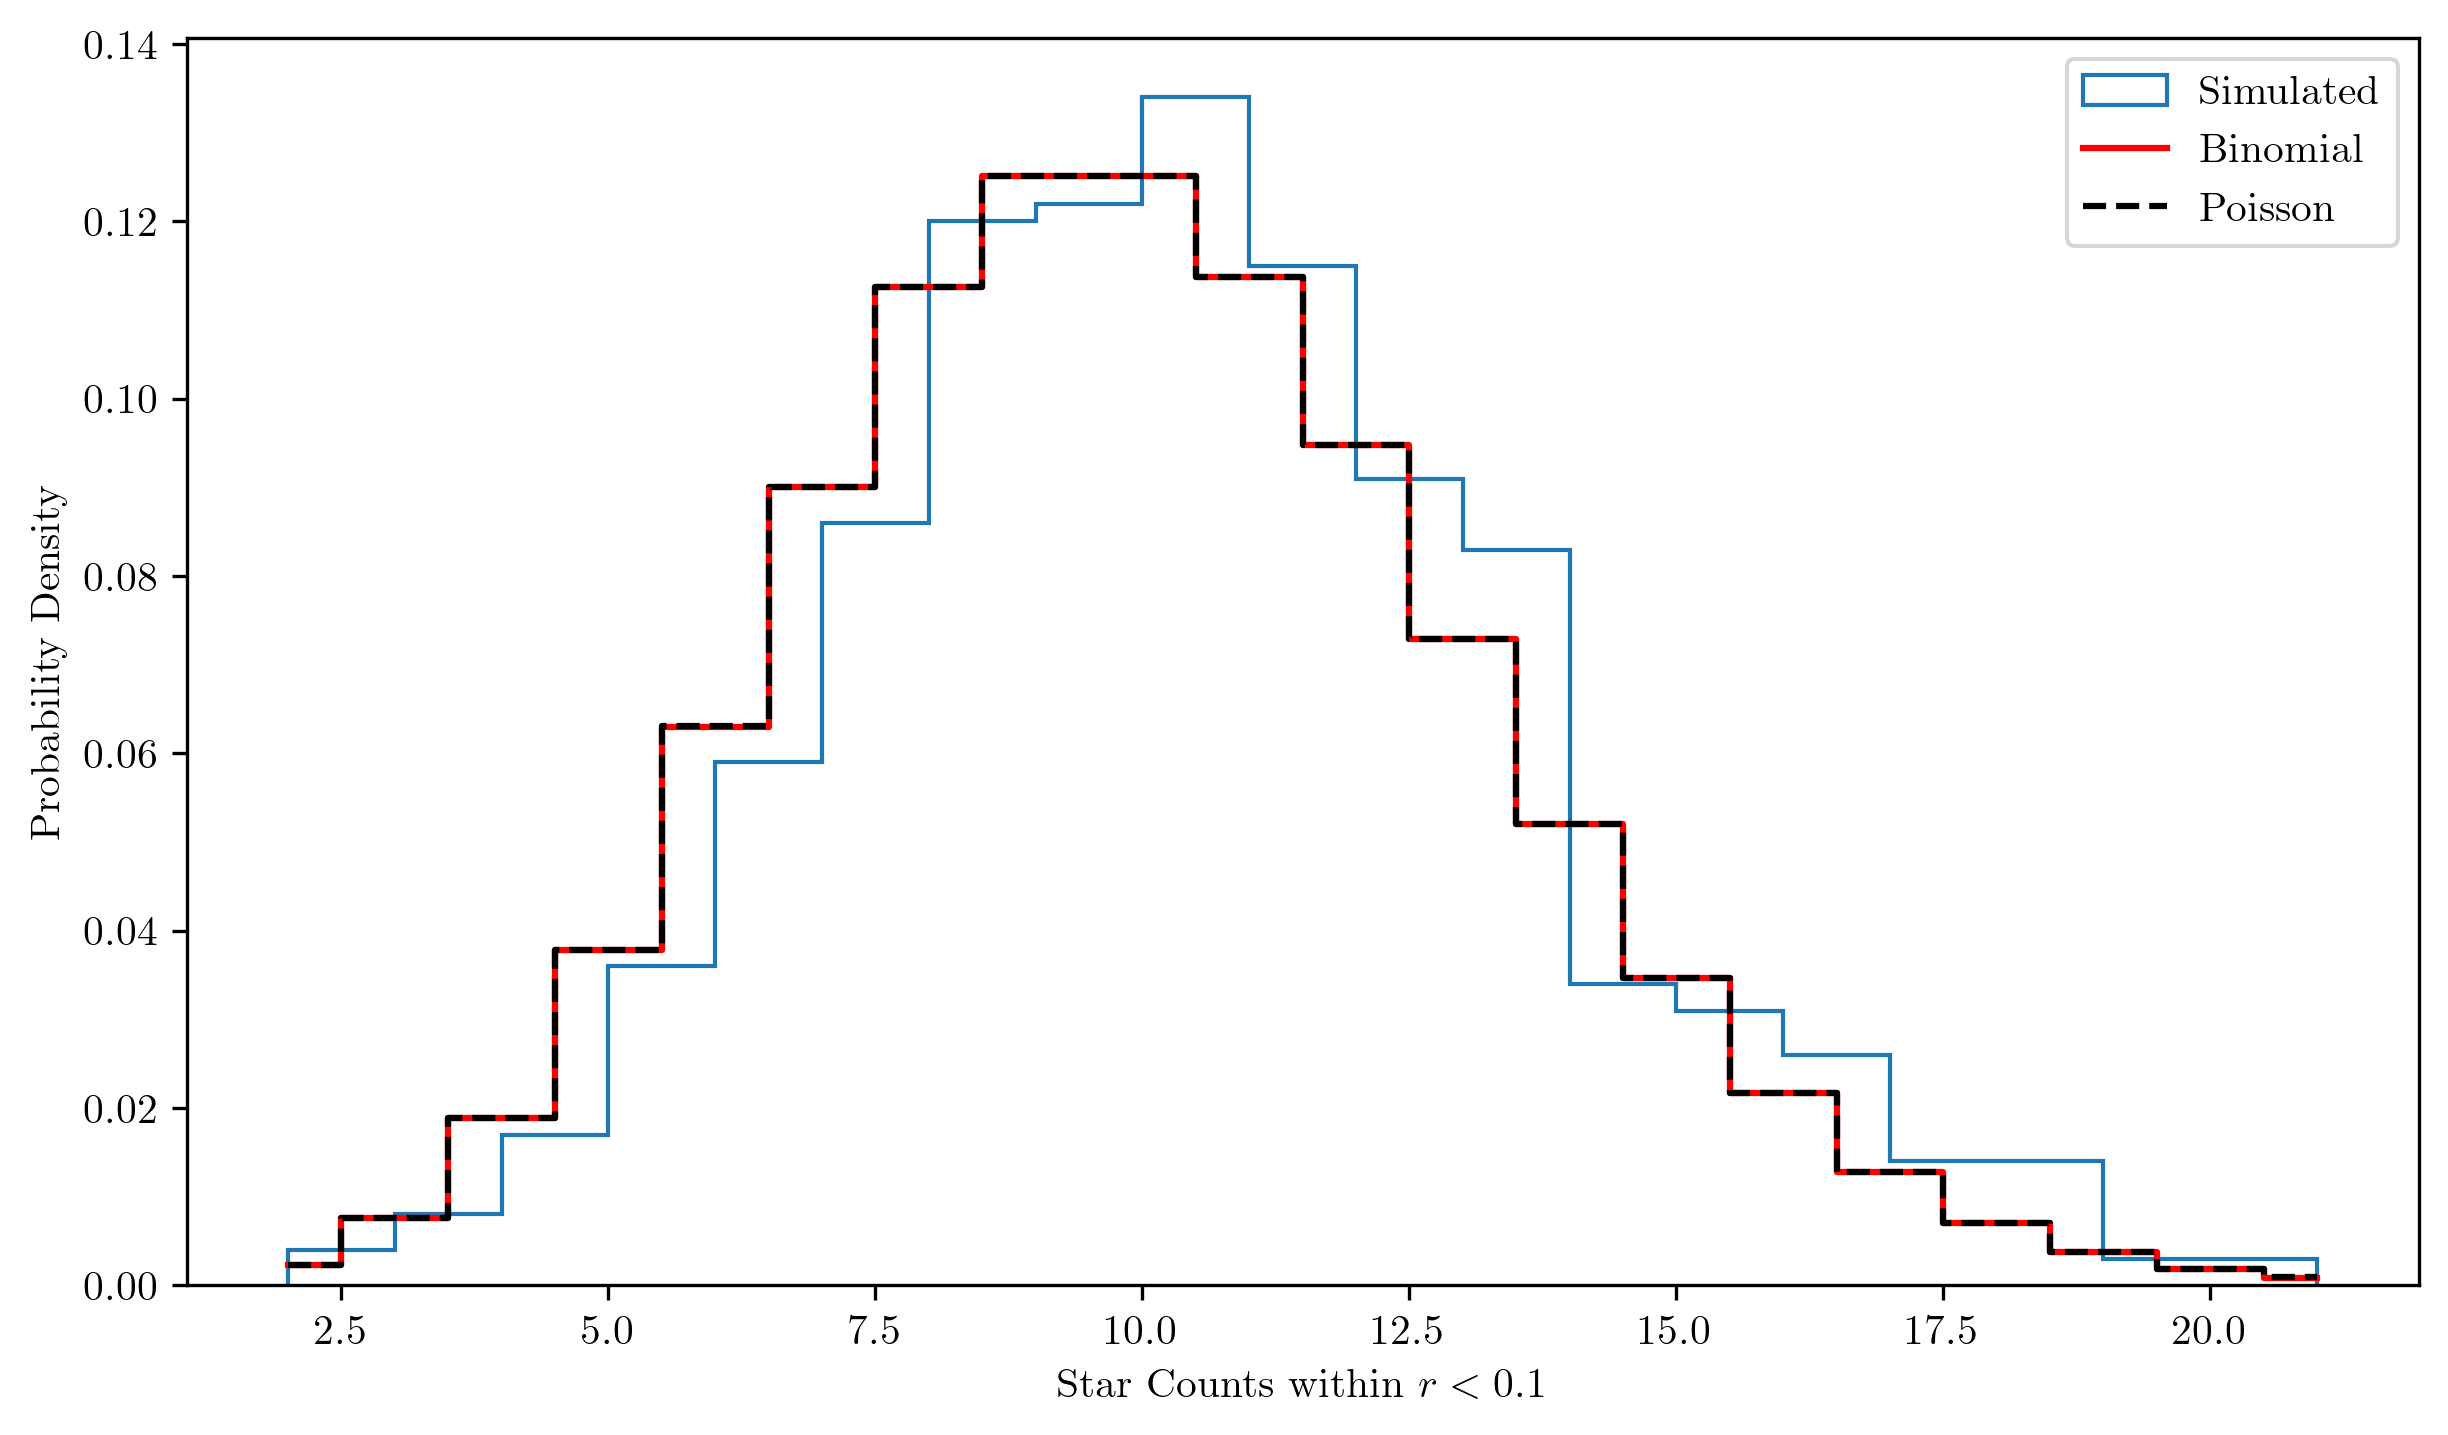

In [21]:
# Count stars within r < 0.1
r_thres_2 = 0.1
counts_2 = [np.sum(r < r_thres_2) for r in r_samples]

# Plot the histogram of counts within r < 0.1
bins_2 = np.arange(min(counts_2), max(counts_2) + 1)
plt.hist(
    counts_2,
    bins = bins_2,
    histtype = 'step',
    density = True,
    label = 'Simulated'
)

# Overlay Binomial and Poisson distributions
# NOTE: EDIT HERE to complete the Binomial parameters
pdf_binom_2 = binom.pmf(bins_2, nstars, r_thres_2**3)
# NOTE: EDIT HERE to complete the Poisson parameter
pdf_poisson_2 = poisson.pmf(bins_2, nstars * r_thres_2**3)
plt.step(
    bins_2,
    pdf_binom_2,
    'r-',
    where = 'mid',
    label = 'Binomial'
)
plt.step(
    bins_2,
    pdf_poisson_2,
    'k--',
    where = 'mid',
    label = 'Poisson'
)

plt.xlabel('Star Counts within $r < 0.1$')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

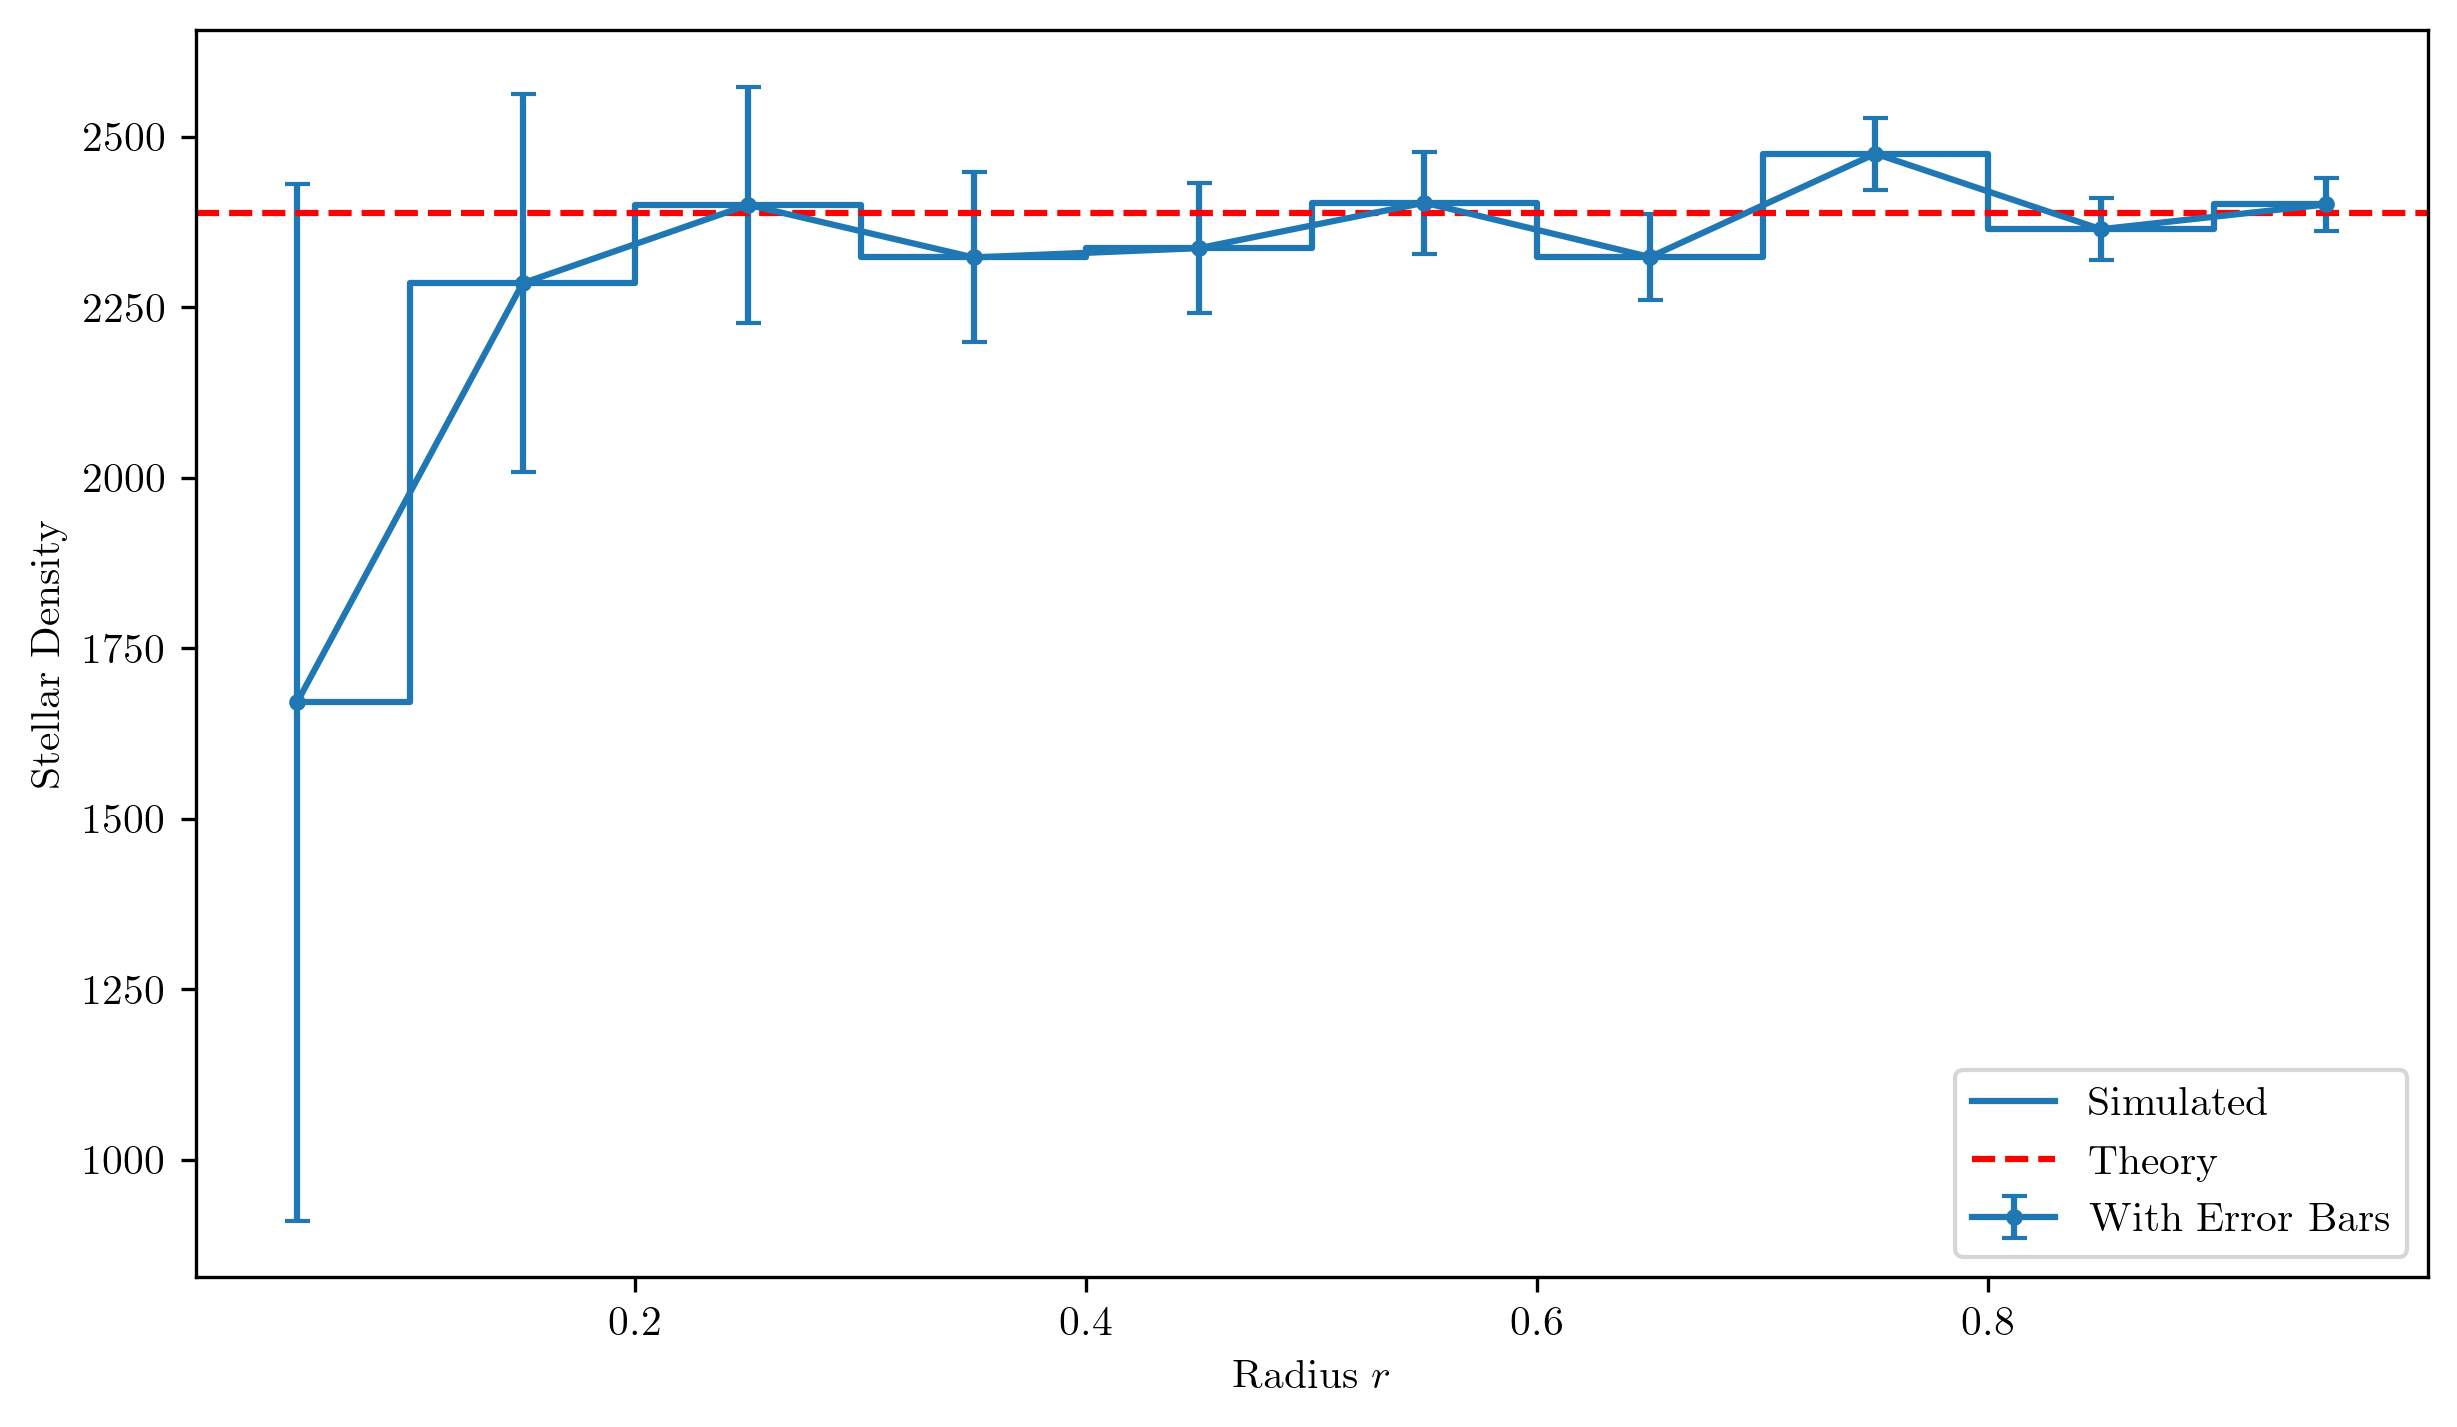

In [22]:

# Define spherical shells with equal thickness
r_edges = np.linspace(0, 1, 11) # 10 shells
r_centers = 0.5 * (r_edges[:-1] + r_edges[1:])
shell_volumes = (4/3) * np.pi * (r_edges[1:]**3 - r_edges[:-1]**3)
# NOTE: EDIT HERE to compute the counts in each shell
shell_counts, _ = np.histogram(r_sampled, bins = r_edges)
# NOTE: EDIT HERE to estimate the errors in counts
# Estimate errors from the ensemble of simulations (sample standard deviation across seeds)
counts_matrix = np.array([np.histogram(r, bins = r_edges)[0] for r in r_samples])
shell_count_errors = counts_matrix.std(axis = 0, ddof = 1)
shell_densities = shell_counts / shell_volumes
shell_density_errors = shell_count_errors / shell_volumes

# Replot the stellar density distribution with error bars
plt.step(
    r_centers,
    shell_densities,
    where = 'mid',
    label = 'Simulated'
)
plt.errorbar(
    r_centers,
    shell_densities,
    yerr = shell_density_errors,
    fmt = '.',
    ls = '-',
    capsize = 3,
    color = 'C0',
    label = 'With Error Bars'
)

# Overlay the theoretical constant density
density_theory = nstars / ((4.0 / 3.0) * np.pi)
plt.axhline(
    density_theory,
    color = 'r',
    linestyle = '--',
    label = 'Theory'
)

plt.xlabel('Radius $r$')
plt.ylabel('Stellar Density')
plt.legend()
plt.show()

##### Discussions

可以看出在 $r$ 更小的区域，星体分布的概率更小，这是符合实际的 ($r$ 越小，体积越小). 另外，分区域的星体数量分布近似于 Poisson 分布和 Gauss 分布.

#### Question 3.3: Flux distribution

Given the luminosity of a star $L$ (energy per unit time), its observed flux at distance $r$ follows the inverse-square law:

$$F = \frac{L}{4 \pi r^2}$$

where $F$ is the flux (energy per unit area per unit time).

**Tasks:**
1. Using the $N=10,000$ stars from Question 3.1, draw luminosities in 4 ways:
    - All stars have the same luminosity $L=10$.
    - A uniform luminosity distribution in the range $L \in [0, 20)$.
    - A log-normal distribution with parameters $\mu=2.2$ and $\sigma=0.3$.
    - A power-law (Pareto) distribution with index $\alpha=2$ and minimum luminosity $L_{\rm min}=1$.
2. For each luminosity distribution (i.e., luminosity function) except the first, plot the histogram of simulated $L$ and overlay the corresponding theoretical distributions.
3. For each luminosity function, plot the histogram of observed stellar fluxes with appropriate axes scales. Can you guess the underlying flux distribution function and overlay it on the histogram?

In [23]:
rng = np.random.default_rng(seed + 1)

luminosity_1 = np.ones(nstars) * 10 # Luminosity of 10 for all stars
luminosity_2 = rng.uniform(0, 20, nstars) # Uniform distribution
luminosity_3 = rng.lognormal(
    mean = 2.2, 
    sigma = 0.3, 
    size = nstars
) # Log-normal distribution
luminosity_4 = (rng.pareto(2, nstars) + 1) # Power-law distribution

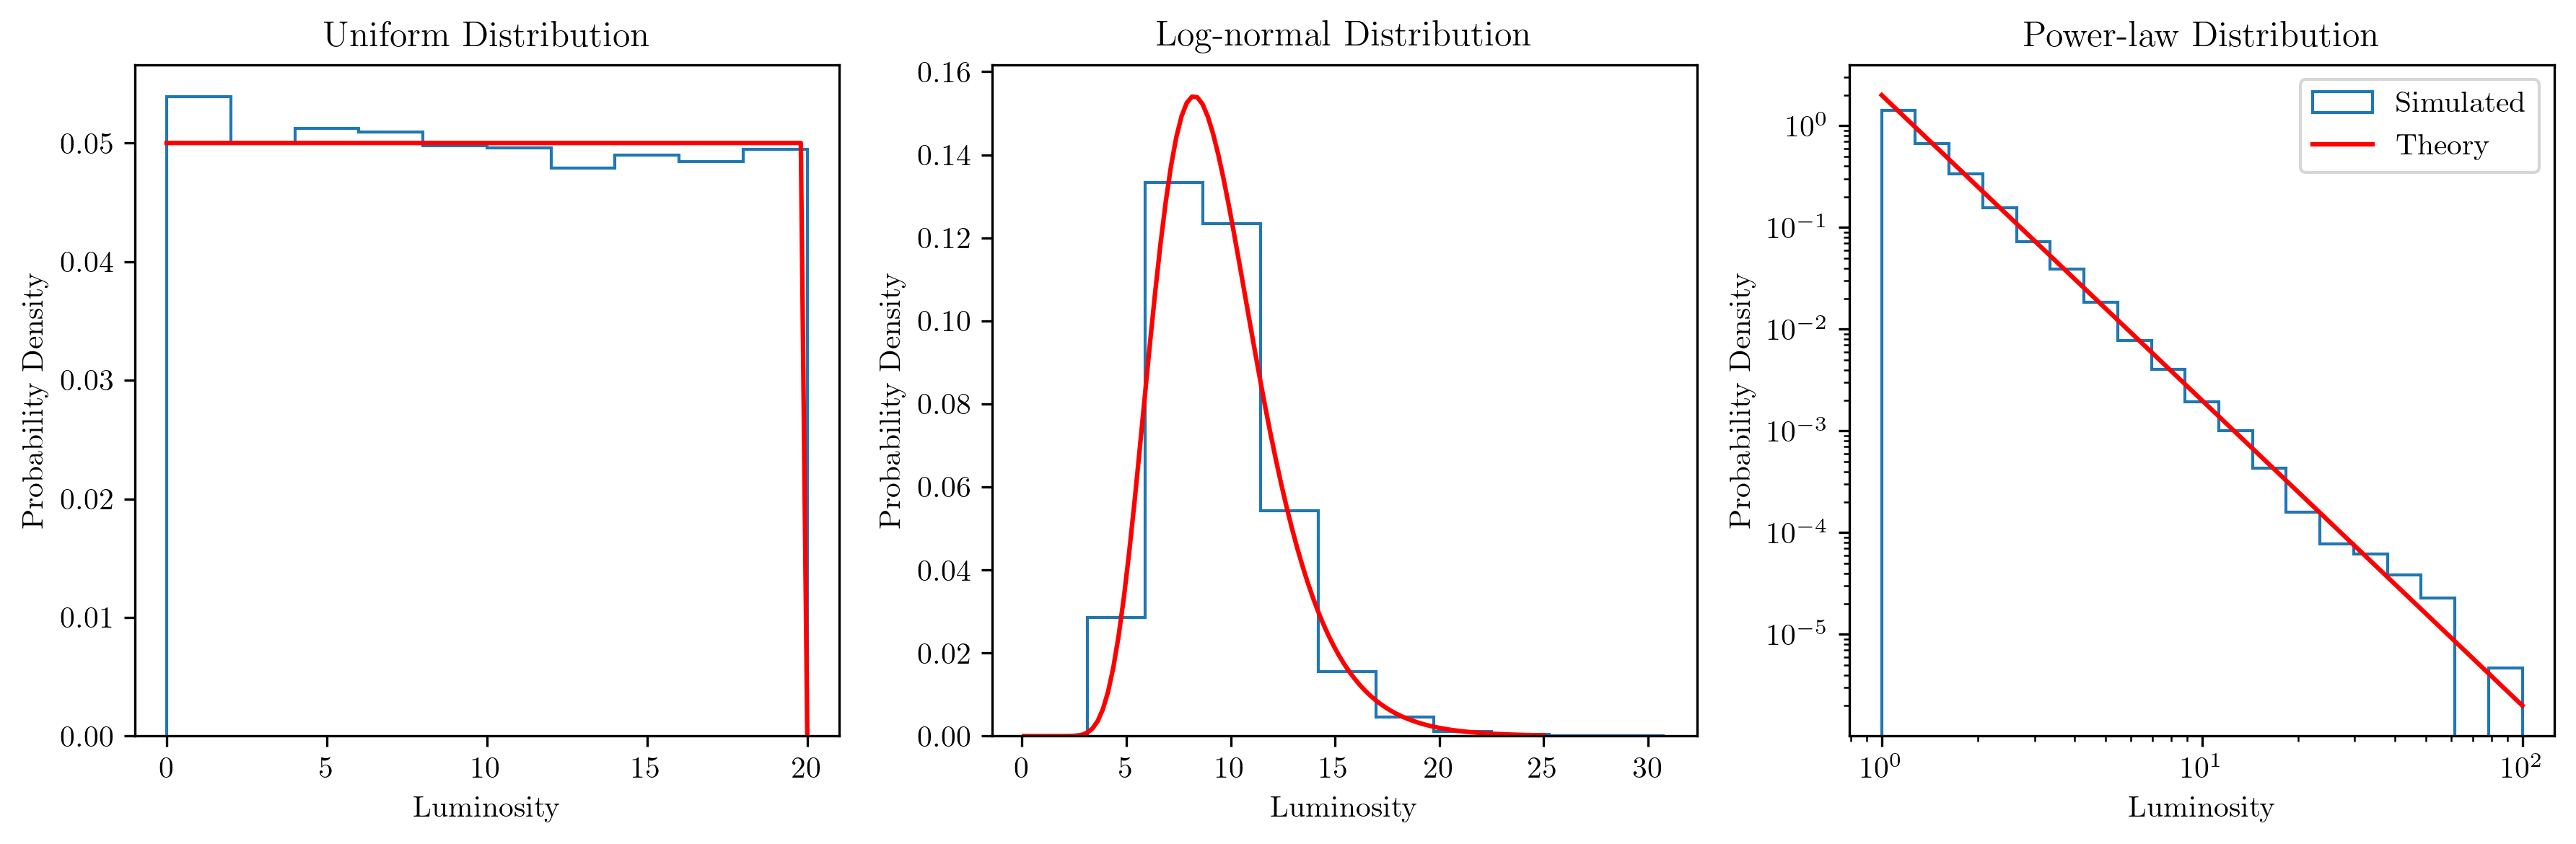

In [24]:
# Plot the histograms of luminosities and overlay theoretical distributions
fig = plt.figure(figsize = (12, 4))
ax = fig.subplots(1, 3).flatten()

# Uniform distribution
ax[0].hist(
    luminosity_2, 
    histtype = 'step',
    density = True,
    label = 'Simulated'
)
x_uniform = np.linspace(0, 20, 100)
# NOTE: EDIT HERE to compute the theoretical PDF of the uniform distribution
y_uniform = np.where((x_uniform >= 0) & (x_uniform < 20), 1.0 / 20.0, 0.0)
ax[0].plot(x_uniform, y_uniform, 'r-', label = 'Theory')
ax[0].set_title('Uniform Distribution')

# Log-normal distribution
ax[1].hist(
    luminosity_3,
    histtype = 'step',
    density = True,
    label = 'Simulated'
)
x_lognormal = np.linspace(0.1, 25, 100)
# NOTE: EDIT HERE to compute the theoretical PDF of the log-normal distribution
mu_ln = 2.2
sigma_ln = 0.3
y_lognormal = (1.0 / (x_lognormal * sigma_ln * np.sqrt(2 * np.pi))) * np.exp(- (np.log(x_lognormal) - mu_ln)**2 / (2 * sigma_ln**2))
ax[1].plot(x_lognormal, y_lognormal, 'r-', label = 'Theory')
ax[1].set_title('Log-normal Distribution')

# Power-law distribution
bins = np.logspace(0, 2, 20)
ax[2].hist(
    luminosity_4,
    bins = bins,
    histtype = 'step',
    density = True,
    label = 'Simulated'
)
x_powerlaw = np.linspace(1, 100, 100)
# NOTE: EDIT HERE to compute the theoretical PDF of the power-law distribution
y_powerlaw = np.where(x_powerlaw >= 1, 2.0 * x_powerlaw**(-3), 0.0)
ax[2].plot(x_powerlaw, y_powerlaw, 'r-', label = 'Theory')
ax[2].set_title('Power-law Distribution')
ax[2].set_xscale('log')
ax[2].set_yscale('log')

for a in ax:
    a.set_xlabel('Luminosity')
    a.set_ylabel('Probability Density')

plt.legend()
plt.tight_layout()
plt.show()

理论分布如何计算？实际上我们这里有几个分布：对于每个 $r$，$L$ 有一个具体的分布，但是这个分布可能和 $r$ 有关；$r$ 自身是均匀分布；我们要求的是 $F$ 的分布函数.

考虑处在 $r\to r+\text{d}r$ 段的 $r$，概率为 $P_r(r)\text{d}r$，这和在 $f\to f+\text{d}f$ 段的 $F$ 概率相等，于是

$$
P_r(r)\text{d}r = P_f(f)\text{d}f \Longrightarrow P_f(f) = P_r(r)\left|\frac{\text{d}r}{\text{d}f}\right|
$$

但是，这里的 $f$ 和 $P_f(f)$ 并不是 $F$ 和 $P_F(F)$！因为我们并未考虑 $L$ 自己分布的影响，所以上面得到的其实是 $P_F(F|L = L_0)$. 利用乘法规则，积分一次应该能够得到我们想要的结果：

$$
P_F(F) = \int_{L'} P_F(F|L = L')P(L')\text{d}L'
$$

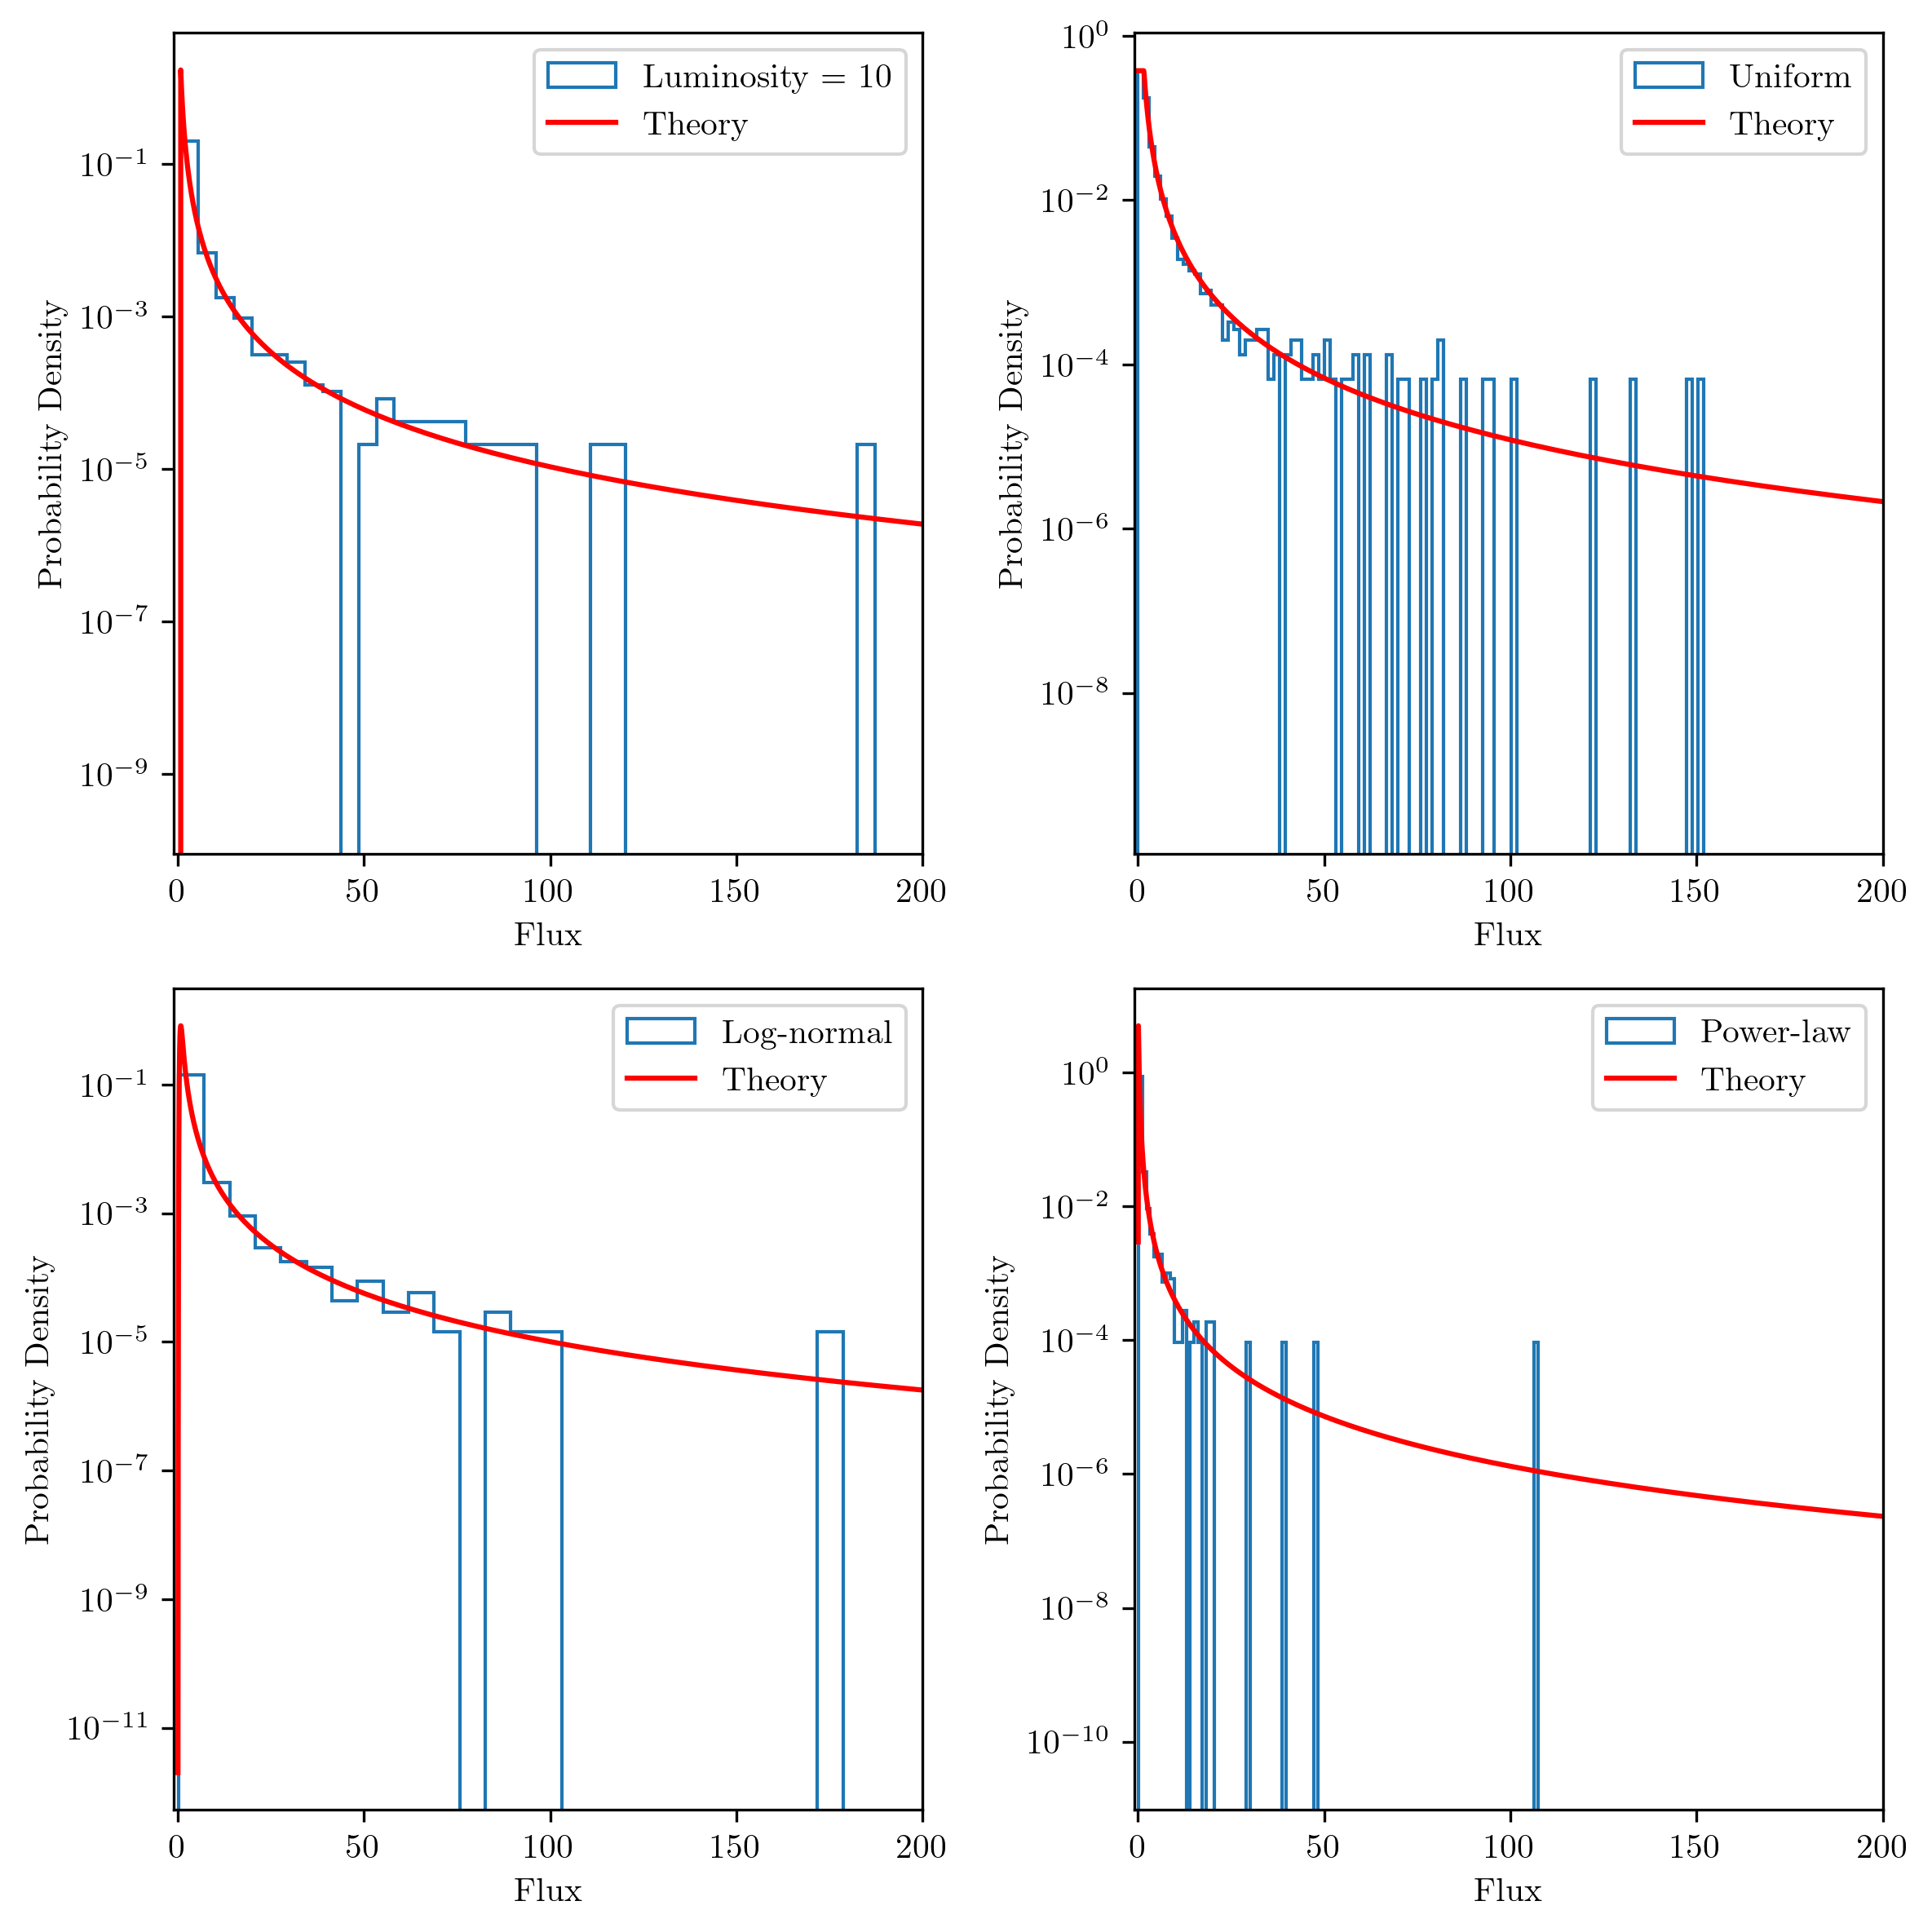

In [25]:
# Compute the observed fluxes
luminosities = [luminosity_1, luminosity_2, luminosity_3, luminosity_4]
labels = ['Luminosity = 10', 'Uniform', 'Log-normal', 'Power-law']
fluxes = [L / (4 * np.pi * r_sampled**2) for L in luminosities]

# Plot the histograms of observed fluxes in the same panel and overlay theoretical distributions
fig = plt.figure(figsize=(8, 8))
ax = fig.subplots(2, 2).flatten()

# Plot the histograms of observed fluxes
# For clarity set x-scale to log for these flux histograms
for i in range(4):
    ax[i].hist(
        fluxes[i],
        bins = 100,
        density = True,
        histtype = 'step',
        label = labels[i],
    )

from math import pi
from scipy.special import erf

# numerical prefactor for the analytic flux PDFs
_PREF = (3.0 / 2.0) / ((4.0 * pi) ** 1.5)

def pdf_flux_const(f, L0):
    f = np.asarray(f, dtype=float)
    fmin = L0 / (4.0 * pi)
    p = np.zeros_like(f)
    mask = f >= fmin
    p[mask] = _PREF * (f[mask] ** -2.5) * (L0 ** 1.5)
    return p

def pdf_flux_uniform(f, low, high):
    f = np.asarray(f, dtype=float)
    a = 4.0 * pi * f
    width = high - low
    I = np.zeros_like(f)
    mask = a > low
    a_clip = np.minimum(a, high)
    I[mask] = ((2.0 / 5.0) * (a_clip[mask] ** 2.5 - low ** 2.5)) / width
    return _PREF * np.where(f > 0, f ** -2.5, 0.0) * I

def _Phi(z):
    # Standard normal CDF using erf
    return 0.5 * (1.0 + erf(z / np.sqrt(2.0)))

def pdf_flux_lognormal(f, mu, sigma):
    f = np.asarray(f, dtype=float)
    a = 4.0 * pi * np.maximum(f, 0.0)
    k = 1.5
    pref_I = np.exp(k * mu + 0.5 * (k ** 2) * (sigma ** 2))
    z = (np.log(np.where(a > 0, a, 1e-300)) - mu - k * (sigma ** 2)) / sigma
    I = pref_I * _Phi(z)
    I[a <= 0] = 0.0
    return _PREF * np.where(f > 0, f ** -2.5, 0.0) * I

def pdf_flux_pareto_alpha2(f, xm=1.0):
    f = np.asarray(f, dtype = float)
    p = np.zeros_like(f)
    fmin = xm / (4.0 * pi)
    mask = f >= fmin
    factor = 4.0 * xm ** 2
    # (1 - (4*pi*f)^-0.5) comes from integrating the Pareto luminosity; keep safe numeric ops
    p[mask] = _PREF * (f[mask] ** -2.5) * factor * (1.0 - (4.0 * pi * f[mask]) ** -0.5)
    return p

# (Optional) overlay theoretical curves for each panel for visual check
f_vals = np.logspace(np.log10(np.nanmax([np.min(fluxes[i][fluxes[i] > 0]) for i in range(4)])) - 1,
                     np.log10(np.nanmax([np.max(fluxes[i]) for i in range(4)])) + 1, 200)

# Avoid potential issues if any flux array has zeros or negative values
f_vals = np.clip(f_vals, 1e-300, None)

# Plot theoretical overlays (choose appropriate parameters for each luminosity function)
ax[0].plot(
    f_vals,
    pdf_flux_const(f_vals, 10.0),
    'r-',
    label = 'Theory'
)
ax[1].plot(
    f_vals,
    pdf_flux_uniform(f_vals, 0.0, 20.0),
    'r-',
    label = 'Theory'
)
ax[2].plot(
    f_vals,
    pdf_flux_lognormal(f_vals, mu = 2.2, sigma = 0.3),
    'r-',
    label = 'Theory'
)
ax[3].plot(
    f_vals,
    pdf_flux_pareto_alpha2(f_vals, xm = 1.0),
    'r-',
    label = 'Theory'
)

for a in ax:
    a.set_xlim(-1, 200)
    a.set_yscale('log')
    a.set_xlabel('Flux')
    a.set_ylabel('Probability Density')
    a.legend()

plt.tight_layout()
plt.show()

### Note: steps for submitting the exercise

1. In the menu bar, select `File > Download` to download your notebook as a `.ipynb` file.
2. Select `File > Save and Export Notebook As > PDF` to export your notebook as a PDF file.
3. Combine the `.ipynb` and `.pdf` files into a single `.zip` or `.tar.gz` archive.
4. Upload your archive to the web learning platform (网络学堂).